| 變量名稱 | 描述 | 
|----------|----------|
| PassengerId | 乘客編號 | 
| Survived  | 是否生還（0=否，1=是) | 
| Pclass | 艙等（1, 2, 3）(ordinal category) |
| Name | 姓名 (text)| 
| Sex | 性別（male, female）(binary category) | 
| Age | 年齡 (numeric, continuous)  | 
| SibSp | 手足及配偶人數 (discrete ordinal) | 
| Parch | 父母及子女人數 (discrete ordinal) | 
| Ticket |船票號碼 (numbers + string)| 
| Fare | 船票價格 (numeric, continuous) | 
| Cabin| 艙房號碼 (numbers + string) | 
| Embarked  | 出發港口（C = Cherbourg, Q = Queenstown, S = Southampton）(category) | 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
print('Training Data Shape:', train_df.shape)
print('Test Data Shape:', test_df.shape)

Training Data Shape: (891, 12)
Test Data Shape: (418, 11)


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
target = train_df['Survived']

In [7]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploring Target Variable

In [8]:
target.unique()

array([0, 1])

In [9]:
# identify Missing Values

if target.isnull().sum() == 0:
    print('No Missing Values')
else:
    print(target.isnull().sum(), 'Here are the Missing Values')

No Missing Values


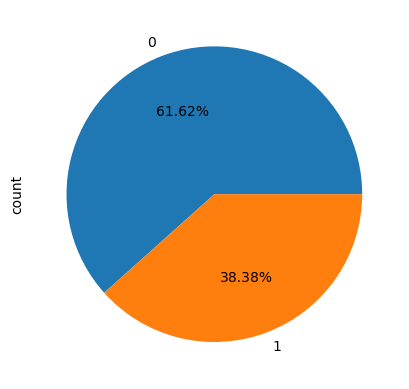

In [10]:
target.value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

## Explore the Features

In [11]:
train_df.info()
print('-----------------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [12]:
# see the unique value of each columns
for column in train_df.columns:
    print(column, len(train_df[column].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


# Filling Missing Values

### Filling Missing Values: Fare and Embarked

In [13]:
train_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
print('Total of Missing Values in Fare for train:', train_df['Fare'].isnull().sum())
print('Total of Missing Values in Fare for test:', test_df['Fare'].isnull().sum())
print('-------------------------------------------------')
print('Total of Missing Values in Embarked for train:', train_df['Embarked'].isnull().sum())
print('Total of Missing Values in Embarked for test:', test_df['Embarked'].isnull().sum())

Total of Missing Values in Fare for train: 0
Total of Missing Values in Fare for test: 1
-------------------------------------------------
Total of Missing Values in Embarked for train: 2
Total of Missing Values in Embarked for test: 0


In [15]:
# because the missing values are insignificant, Fare : use the median to fillna, Embarked: use the most frequence

train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

### Filling Missing Values: Age

In [16]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
print(train_df['Age'].isnull().sum())
print(test_df['Age'].isnull().sum())

177
86


Age_NA
0    714
1    177
Name: count, dtype: int64


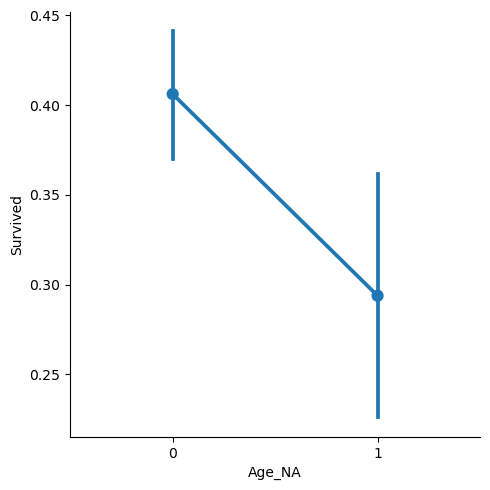

In [18]:
# When There's missing values =1, no missing values =0
train_df['Age_NA'] = np.where(train_df['Age'].isnull(), 1, 0)
test_df['Age_NA'] = np.where(test_df['Age'].isnull(), 1, 0)

print(train_df['Age_NA'].value_counts())
sns.catplot(data=train_df,x='Age_NA',y='Survived',kind='point')
plt.show()

# people with missing values, survival rate is lower than have age values

skew of training data: 0.38910778230082704


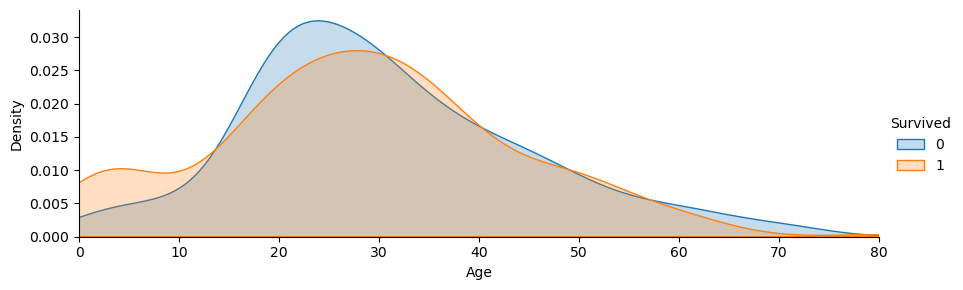

In [19]:
g = sns.FacetGrid(train_df,hue='Survived',aspect=3)
g.map(sns.kdeplot, 'Age', shade=True)
g.set(xlim=(0, train_df['Age'].max()))
g.add_legend()

# skew > 0, distribution is right-skewed; skew < 0, distribution is left-skewed
# If the skewness value is between -0.5 and 0.5, the data distribution can be considered roughly symmetrical.
# If the skewness value is greater than 1 or less than -1, the data distribution shows a higher degree of skewness.

print('skew of training data:', train_df['Age'].skew())

# data is almost normal

In [20]:
train_df['Age_mean'] = np.where(train_df['Age'].isnull(), train_df['Age'].mean(), train_df['Age'])
test_df['Age_mean'] = np.where(test_df['Age'].isnull(), test_df['Age'].mean(), test_df['Age'])

skew of training data: 0.4344880940129925


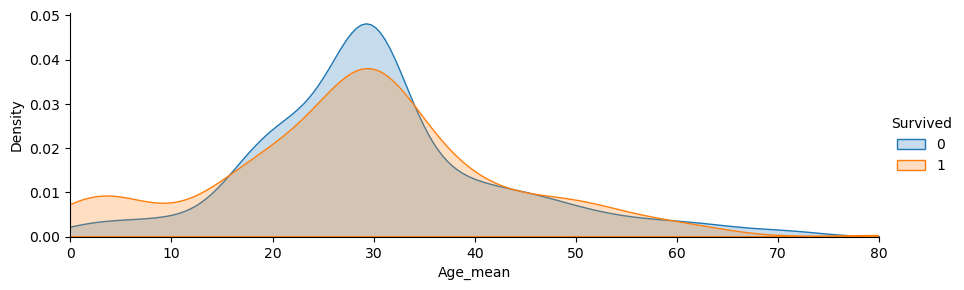

In [21]:
g = sns.FacetGrid(train_df,hue='Survived',aspect=3)
g.map(sns.kdeplot, 'Age_mean', shade=True)
g.set(xlim=(0, train_df['Age_mean'].max()))
g.add_legend()

print('skew of training data:', train_df['Age_mean'].skew())

In [22]:
# In many cases, to simplify the modeling process and improve efficiency, high cardinality (multi-category) features are often removed or ignored before training the model.
# However, these features may still contain valuable information that could benefit predictions. When dealing with such high cardinality features, several methods can be adopted to extract useful information,
# e.g., aggregating categories, feature encoding (such as using one-hot encoding or other encoding techniques), and dimensionality reduction, to utilize these features more effectively.
# Therefore, when properly processed and analyzed, they can still provide valuable insights, helping to improve the model and enhance prediction accuracy.


for column in train_df.columns:
    print(column, len(train_df[column].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 3
Age_NA 2
Age_mean 89


### Passenger ID

In [23]:
train_df = train_df.drop('PassengerId',axis=1)
test_df = test_df.drop('PassengerId',axis=1)

In [24]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,Age_mean
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0


### Ticket

In [25]:
train_df['Ticket'][:10]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [26]:
# create a fuction to seperate the ticket type
# string.punctuation can look into punctuation, and replace all punctuation by space
# If splited_data == 1, there is no delimiter; otherwise, choose the first part before the delimiter.

def ticket_sep(data_ticket):
    ticket_type = []
    
    for i in range(len(data_ticket)):
        
        ticket = data_ticket.iloc[i]
        
        for c in string.punctuation:
            ticket = ticket.replace(c,'')
            splited_ticket = ticket.split(' ')
        if len(splited_ticket) == 1:
            ticket_type.append('No')
        else:
            ticket_type.append(splited_ticket[0])
    
    return ticket_type            

In [27]:
train_df['ticket_type'] = ticket_sep(train_df['Ticket'])

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,Age_mean,ticket_type
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0,A5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,PC
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.0,STONO2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,No
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0,No


In [28]:
test_df['ticket_type'] = ticket_sep(test_df['Ticket'])

test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,Age_mean,ticket_type
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,34.5,No
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,47.0,No
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,62.0,No
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,27.0,No
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,22.0,No


ticket_type
No         665
PC          60
CA          41
A5          21
SOTONOQ     15
STONO       12
WC          10
SCPARIS      7
A4           7
STONO2       6
SOC          6
FCC          5
C            5
SCParis      4
WEP          3
SCAH         3
SOPP         3
PP           3
SOTONO2      2
SWPP         2
PPP          2
FC           1
AS           1
SCOW         1
SC           1
SP           1
Fa           1
SOP          1
SCA4         1
CASOTON      1
Name: count, dtype: int64


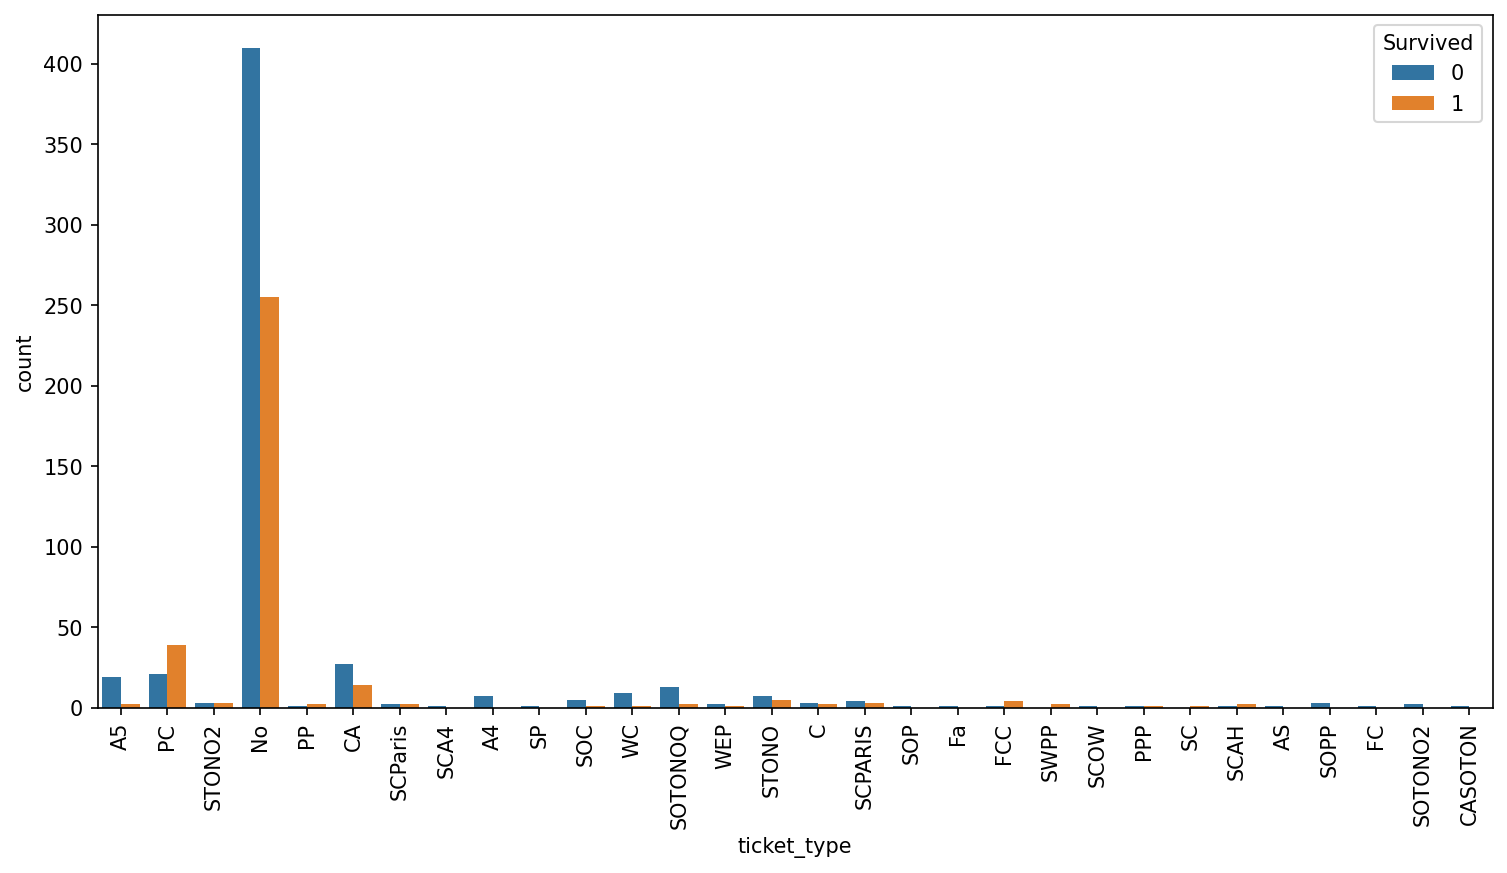

In [29]:
print(train_df['ticket_type'].value_counts())
plt.figure(figsize=(12,6),dpi=150)
sns.countplot(data=train_df,x='ticket_type',hue='Survived')
plt.xticks(rotation=90)
plt.show()

In [30]:
# Too many different type of tickets, we can put less than 15 samples to one group
# use .loc choose (row,column)
for t in train_df['ticket_type'].unique():
    if len(train_df[train_df['ticket_type'] == t]) < 15:
        train_df.loc[train_df['ticket_type'] == t, 'ticket_type'] = 'Other_T'


# Ensure that any 'ticket_type' values in test_df that are different from those in train_df are 
# marked as 'OTHER_T', thereby keeping the 'ticket_type' values consistent between the two datasets.
# loc the location where 'ticket_type' == t, if it's ture will be set to 'Other_T'
for t in test_df['ticket_type'].unique():
    if t not in train_df['ticket_type'].unique():
        test_df.loc[test_df['ticket_type'] == t, 'ticket_type'] = 'Other_T'
        
print(train_df['ticket_type'].unique())
print(test_df['ticket_type'].unique())

['A5' 'PC' 'Other_T' 'No' 'CA' 'SOTONOQ']
['No' 'Other_T' 'PC' 'A5' 'CA' 'SOTONOQ']


ticket_type
No         0.746352
Other_T    0.099888
PC         0.067340
CA         0.046016
A5         0.023569
SOTONOQ    0.016835
Name: count, dtype: float64


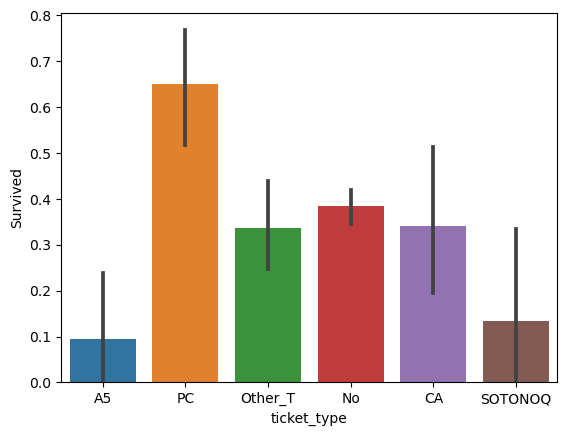

In [31]:
print(train_df['ticket_type'].value_counts() / len(train_df))
sns.barplot(data=train_df,x='ticket_type',y='Survived')
plt.show()

ticket_type
No         0.746352
Other_T    0.099888
PC         0.067340
CA         0.046016
A5         0.040404
Name: count, dtype: float64


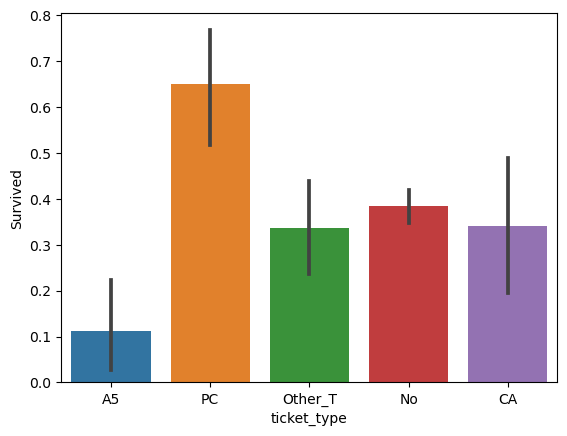

In [32]:
# A5 and SOTONOQ are similar, they're all rare categoical, can combine each other
train_df['ticket_type'] = np.where(train_df['ticket_type'] == 'SOTONOQ', 'A5', train_df['ticket_type'])
test_df['ticket_type'] = np.where(test_df['ticket_type'] == 'SOTONOQ', 'A5', test_df['ticket_type'])
print(train_df['ticket_type'].value_counts() / len(train_df))
sns.barplot(data=train_df, x='ticket_type', y='Survived')
plt.show()

In [33]:
train_df = train_df.drop('Ticket',axis=1)
test_df = test_df.drop('Ticket',axis=1)

### Cabin

In [34]:
print('Missing Values in Train:', train_df['Cabin'].isnull().sum())
print('Missing Values in Test:', test_df['Cabin'].isnull().sum())

Missing Values in Train: 687
Missing Values in Test: 327


In [35]:
train_df['Cabin'][:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [36]:
# The front number on Cabin is deck, maybe will impact the Survival rate
# If there's not null value, grab the first letter

def cabin_sep(data_cabin):
    cabin_type = []
    
    for i in range(len(data_cabin)):
        
        if data_cabin.isnull()[i] == True:
            cabin_type.append('NAN')
        else:
            cabin = data_cabin[i]
            cabin_type.append(cabin[0])
    
    return cabin_type

In [37]:
train_df['cabin_type'] = cabin_sep(train_df['Cabin'])
test_df['cabin_type'] = cabin_sep(test_df['Cabin'])

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_NA,Age_mean,ticket_type,cabin_type
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,0,22.0,A5,NAN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,0,38.0,PC,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,0,26.0,Other_T,NAN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,0,35.0,No,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,0,35.0,No,NAN


cabin_type
NAN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: count, dtype: int64


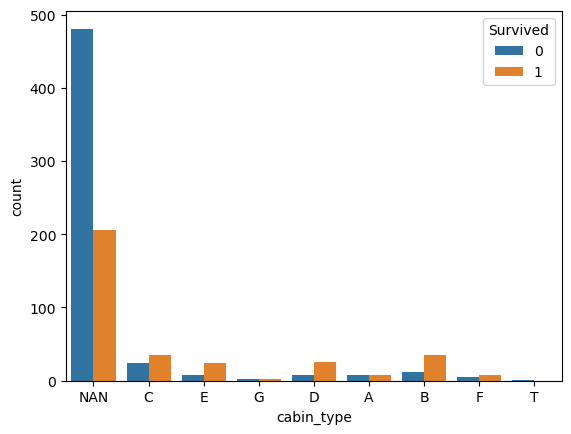

In [38]:
print(train_df['cabin_type'].value_counts())
sns.countplot(data=train_df,x='cabin_type',hue='Survived')
plt.show()

In [39]:
# Let's convert it again, less than 15 numbers put them to OTHER_C
for t in train_df['cabin_type'].unique():
    if len(train_df[train_df['cabin_type'] == t]) < 15:
        train_df.loc[train_df['cabin_type'] == t, 'cabin_type'] = 'OTHER_C'
        
for t in test_df['cabin_type'].unique():
    if t not in train_df['cabin_type'].unique():
        test_df.loc[test_df['cabin_type'] == t, 'cabin_type'] = 'OTHER_C'
        
print(train_df['cabin_type'].unique())
print(test_df['cabin_type'].unique())

['NAN' 'C' 'E' 'OTHER_C' 'D' 'A' 'B']
['NAN' 'B' 'E' 'A' 'C' 'D' 'OTHER_C']


cabin_type
NAN        0.771044
C          0.066218
B          0.052750
D          0.037037
E          0.035915
OTHER_C    0.020202
A          0.016835
Name: count, dtype: float64


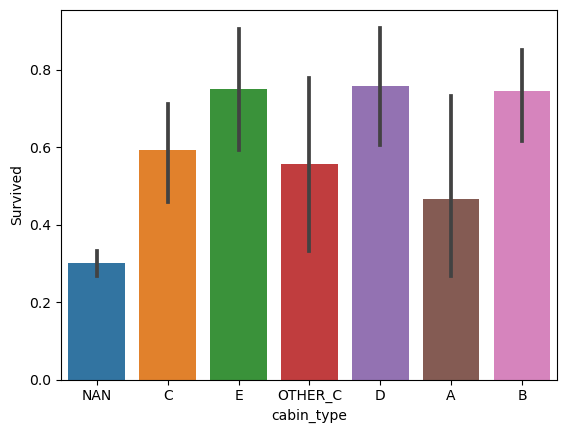

In [40]:
print(train_df['cabin_type'].value_counts() / len(train_df))
sns.barplot(data=train_df, x='cabin_type', y='Survived')
plt.show()

In [41]:
train_df = train_df.drop('Cabin',axis=1)
test_df = test_df.drop('Cabin',axis=1)

### Name

In [42]:
train_df['Name'][:10]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [43]:
# Feature 'Name' has following structure:
# Family name--> "," --> Title --> Name --> "(" --> some name in bracket.
# Separate this into new features and drop Name as it is high cardinal feature.
# create a function, seperate the title and family name, delet all punctuation from name column
# finally remove all punctuation and accept bracket
def name_sep(data):
    families = []
    titles = []
    new_name = []
    for i in range(len(data)):
        name = data.iloc[i]
        if '(' in name:
            name_no_bracket = name.split('(')[0]
        else:
            name_no_bracket = name
        
        family = name_no_bracket.split(',')[0]
        title = name_no_bracket.split(',')[1].strip().split(' ')[0]
        
        for c in string.punctuation:
            name = name.replace(c,'').strip()
            family = family.replace(c,'').strip()
            title = title.replace(c,'').strip()
        
        families.append(family)
        titles.append(title)
        new_name.append(name)
    
    return families, titles, new_name

In [44]:
train_df['Family'], train_df['Title'], train_df['Name'] = name_sep(train_df['Name'])
test_df['Family'], test_df['Title'], test_df['Name'] = name_sep(test_df['Name'])

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Family,Title
0,0,3,Braund Mr Owen Harris,male,22.0,1,0,7.2500,S,0,22.0,A5,NAN,Braund,Mr
1,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Cumings,Mrs
2,1,3,Heikkinen Miss Laina,female,26.0,0,0,7.9250,S,0,26.0,Other_T,NAN,Heikkinen,Miss
3,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,53.1000,S,0,35.0,No,C,Futrelle,Mrs
4,0,3,Allen Mr William Henry,male,35.0,0,0,8.0500,S,0,35.0,No,NAN,Allen,Mr


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
the           1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


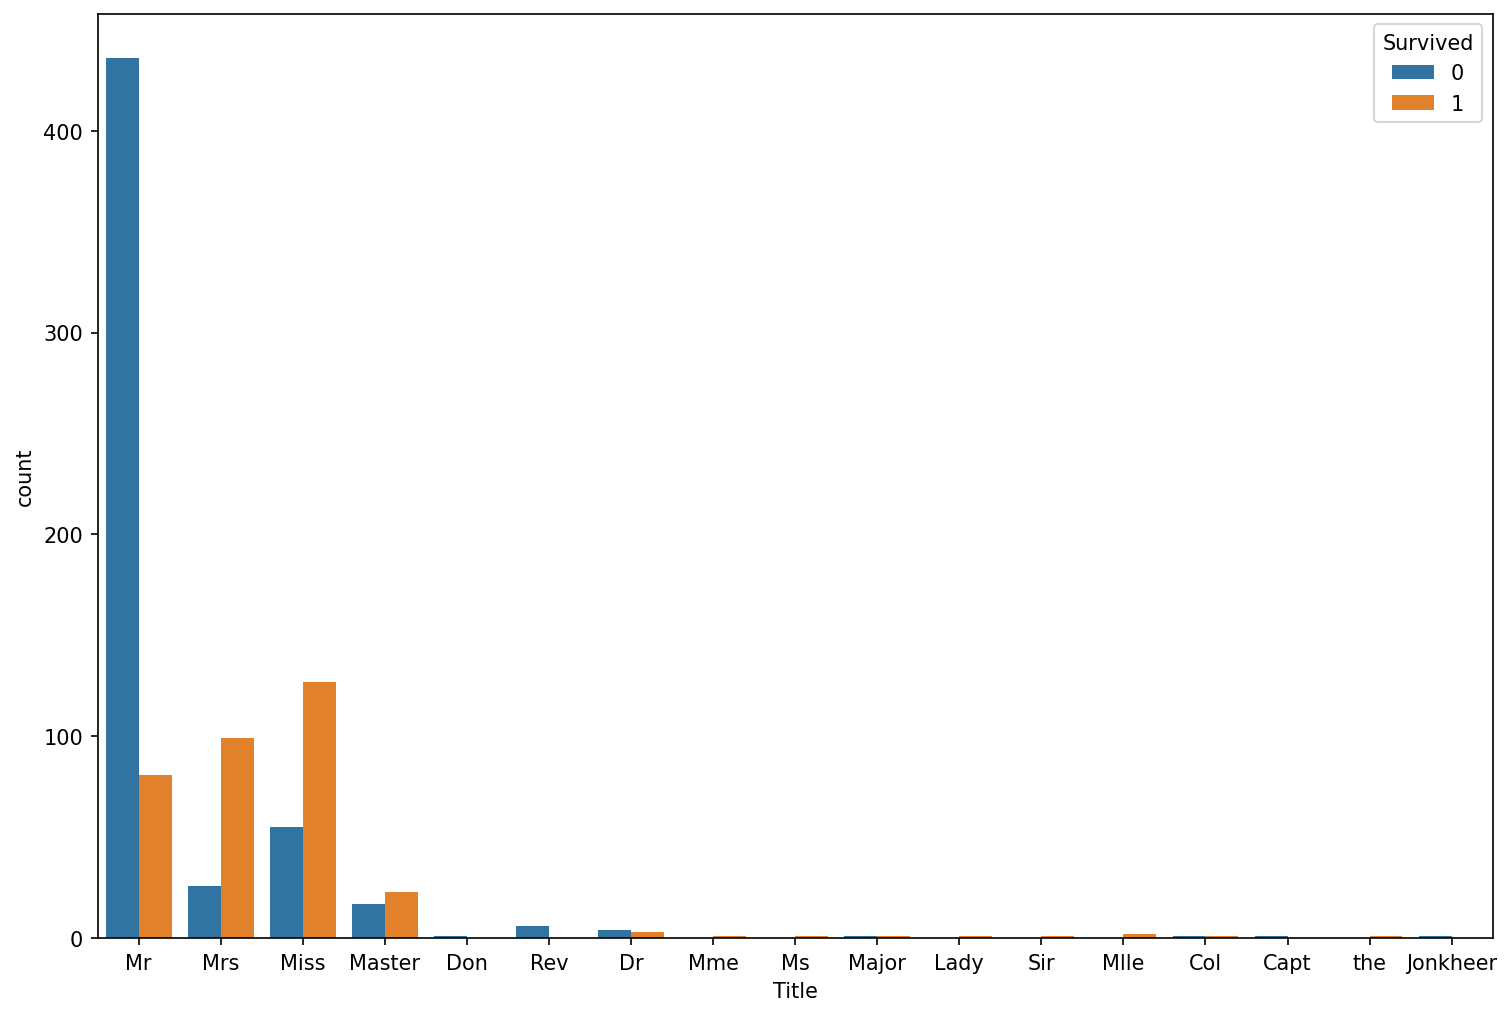

In [45]:
print(train_df['Title'].value_counts())
plt.figure(figsize=(12,8),dpi=150)
sns.countplot(data=train_df,x='Title',hue='Survived')
plt.show()

In [46]:
# Replace titles in train_df that appear 15 times or less with 'OTHER'
for t in train_df['Title'].unique():
    if len(train_df[train_df['Title'] == t]) <= 15:
        train_df.loc[train_df['Title'] == t, 'Title'] = 'OTHER'

# Replace titles in test_df that are not present in train_df with 'OTHER'        
for t in test_df['Title'].unique():
    if t not in train_df['Title'].unique():
        test_df.loc[test_df['Title'] == t, 'Title'] = 'OTHER'

print(train_df['Title'].unique())
print(test_df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'OTHER']
['Mr' 'Mrs' 'Miss' 'Master' 'OTHER']


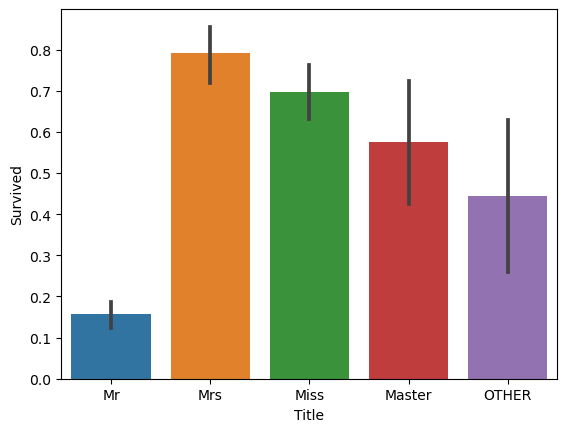

In [47]:
sns.barplot(data=train_df,x='Title',y='Survived')
plt.show()

In [48]:
# len([x for x in train_df['Family'].unique() if x in test_df['Family'].unique()]), the same as below

common_unique_values = []
for x in train_df['Family'].unique():
    if x in test_df['Family'].unique():
        common_unique_values.append(x)
        
common_unique_count = len(common_unique_values)
print(common_unique_count)

144


In [49]:
# len([x for x in train_df['Family'].unique() if x not in test_df['Family'].unique()])
# There are 523 unique in train set that non overlapping with test set
non_overlapping = []
for x in train_df['Family'].unique():
    if x not in test_df['Family'].unique():
        non_overlapping.append(x)
        
non_overlapping_count = len(non_overlapping)
print(non_overlapping_count)

523


In [50]:
# len[x for x in test_df['Family'].unqiue() if x not in train_df['Family'].unique()]
# There are 208 unique in test set that non overlapping with train set
non_overlapping = []
for x in test_df['Family'].unique():
    if x not in train_df['Family'].unique():
        non_overlapping.append(x)
        
non_overlapping_count = len(non_overlapping)
print(non_overlapping_count)

208


In [51]:
# create a lsit with overlapping families
overlap = [x for x in train_df['Family'].unique() if x in test_df['Family'].unique()]

In [52]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Family,Title
0,0,3,Braund Mr Owen Harris,male,22.0,1,0,7.2500,S,0,22.0,A5,NAN,Braund,Mr
1,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Cumings,Mrs
2,1,3,Heikkinen Miss Laina,female,26.0,0,0,7.9250,S,0,26.0,Other_T,NAN,Heikkinen,Miss
3,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,53.1000,S,0,35.0,No,C,Futrelle,Mrs
4,0,3,Allen Mr William Henry,male,35.0,0,0,8.0500,S,0,35.0,No,NAN,Allen,Mr


In [53]:
# +1 = himself
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_Size'] = test_df['SibSp'] + test_df['Parch'] + 1

rate_family = train_df.groupby('Family')[['Survived', 'Family_Size']].median()
rate_family.head()

,Survived,Family_Size
Family,,
Abbing,0.0,1.0
Abbott,0.5,3.0
Abelson,0.5,2.0
Adahl,0.0,1.0
Adams,0.0,1.0


In [54]:
# iloc[row,column]
overlap_family = {}
for i in range(len(rate_family)):
    if rate_family.index[i] in overlap and rate_family.iloc[i,1] > 1:
        overlap_family[rate_family.index[i]] = rate_family.iloc[i,0]

In [55]:
# To indicate non-duplication of data, 'family_survival_rate_NA' is set to show 
# whether a family survival rate exists.
# If in overlap family use the survival rate above, otherwise use mean survival rate
mean_survival_rate = np.mean(train_df['Survived'])
family_survival_rate = []
family_survival_rate_NA = []

for i in range(len(train_df)):
    if train_df['Family'][i] in overlap_family:
        family_survival_rate.append(overlap_family[train_df['Family'][i]])
        family_survival_rate_NA.append(1)
    
    else:
        family_survival_rate.append(mean_survival_rate)
        family_survival_rate_NA.append(0)

train_df['Family_survival_rate'] = family_survival_rate
train_df['Family_survival_rate_NA'] = family_survival_rate_NA

In [56]:
mean_survival_rate = np.mean(train_df['Survived'])
family_survival_rate = []
family_survival_rate_NA = []

for i in range(len(test_df)):
    if test_df['Family'][i] in overlap_family:
        family_survival_rate.append(overlap_family[test_df['Family'][i]])
        family_survival_rate_NA.append(1)
        
    else:
        family_survival_rate.append(mean_survival_rate)
        family_survival_rate_NA.append(0)

test_df['Family_survival_rate'] = family_survival_rate
test_df['Family_survival_rate_NA'] = family_survival_rate_NA

In [57]:
train_df = train_df.drop(['Name', 'Family'], axis=1)
test_df = test_df.drop(['Name', 'Family'], axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,male,22.0,1,0,7.2500,S,0,22.0,A5,NAN,Mr,2,0.383838,0
1,1,1,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,0,0,7.9250,S,0,26.0,Other_T,NAN,Miss,1,0.383838,0
3,1,1,female,35.0,1,0,53.1000,S,0,35.0,No,C,Mrs,2,0.383838,0
4,0,3,male,35.0,0,0,8.0500,S,0,35.0,No,NAN,Mr,1,0.383838,0


## Dealing with Outliers

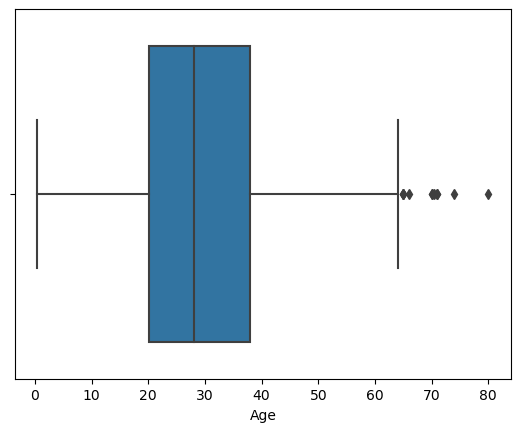

In [58]:
# There are 3 features can be outliers, Fare, Age, Age_mean
sns.boxplot(x = train_df['Age'])
plt.show()

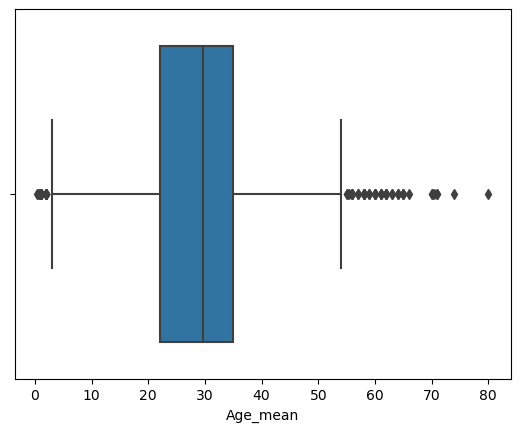

In [59]:
sns.boxplot(x = train_df['Age_mean'])
plt.show()

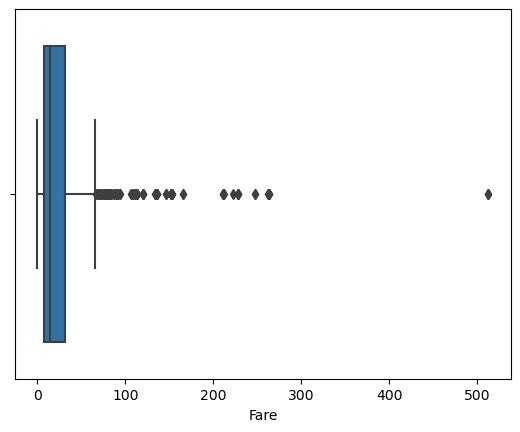

In [60]:
sns.boxplot(x = train_df['Fare'])
plt.show()

In [61]:
print('skew for Age_mean:', train_df['Age_mean'].skew())
print('skew for Fare:', train_df['Fare'].skew())

skew for Age_mean: 0.4344880940129925
skew for Fare: 4.787316519674893


In [62]:
# calculate the IQR and upper bound, so can set the threshold
# Q3:0.75 - Q1:0.25 = Q2:0.5
IQR = train_df['Fare'].quantile(0.75) - train_df['Fare'].quantile(0.25)
upper_bound = train_df['Fare'].quantile(0.75) + 3*IQR

train_df.loc[train_df['Fare'] > upper_bound, 'Fare'] = upper_bound
test_df.loc[test_df['Fare'] > upper_bound, 'Fare'] = upper_bound

max(train_df['Fare'])

100.2688

In [63]:
IQR = train_df['Age_mean'].quantile(0.75) - train_df['Age_mean'].quantile(0.25)
upper_bound = train_df['Age_mean'].quantile(0.75) + 3*IQR

train_df.loc[train_df['Age_mean'] > upper_bound, 'Age_mean'] = upper_bound
test_df.loc[test_df['Age_mean'] > upper_bound, 'Age_mean'] = upper_bound

max(train_df['Age_mean'])

74.0

In [64]:
#  triple standard difference method
upper_bound = train_df['Age'].mean() + 3*train_df['Age'].std()

train_df.loc[train_df['Age'] > upper_bound, 'Age'] = upper_bound
test_df.loc[test_df['Age'] > upper_bound, 'Age'] = upper_bound

max(train_df['Age'])

73.27860964406095

### Features with rare values

In [65]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,male,22.0,1,0,7.2500,S,0,22.0,A5,NAN,Mr,2,0.383838,0
1,1,1,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,0,0,7.9250,S,0,26.0,Other_T,NAN,Miss,1,0.383838,0
3,1,1,female,35.0,1,0,53.1000,S,0,35.0,No,C,Mrs,2,0.383838,0
4,0,3,male,35.0,0,0,8.0500,S,0,35.0,No,NAN,Mr,1,0.383838,0


In [66]:
# rare values will cause overfitting, especially the tree models
# already drop some high cardinal features, so only interest in Pclass,Sex,SibSp,Parch,Embarked

columns = ['Pclass','Sex','SibSp','Parch','Embarked']

for column in columns:
    print(column)
    print(train_df[column].unique())
    print(test_df[column].unique())

Pclass
[3 1 2]
[3 2 1]
Sex
['male' 'female']
['male' 'female']
SibSp
[1 0 3 4 2 5 8]
[0 1 2 3 4 5 8]
Parch
[0 1 2 5 3 4 6]
[0 1 3 2 4 6 5 9]
Embarked
['S' 'C' 'Q']
['Q' 'S' 'C']


### Rare variables : SibSp & Parch

In [67]:
print(train_df['Family_Size'].unique())
print(test_df['Family_Size'].unique())

[ 2  1  5  3  7  6  4  8 11]
[ 1  2  3  5  4  6  8  7 11]


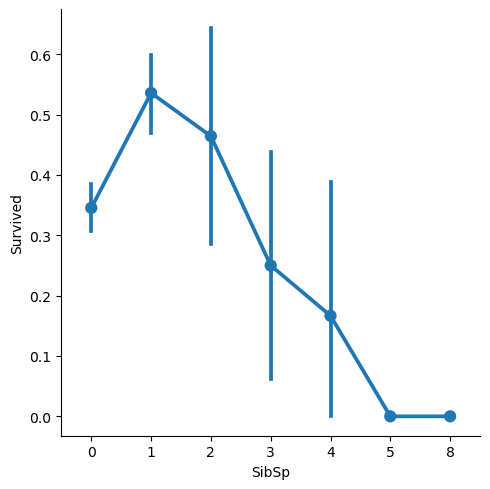

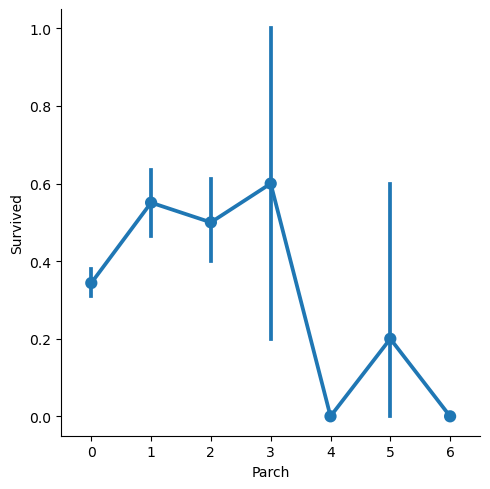

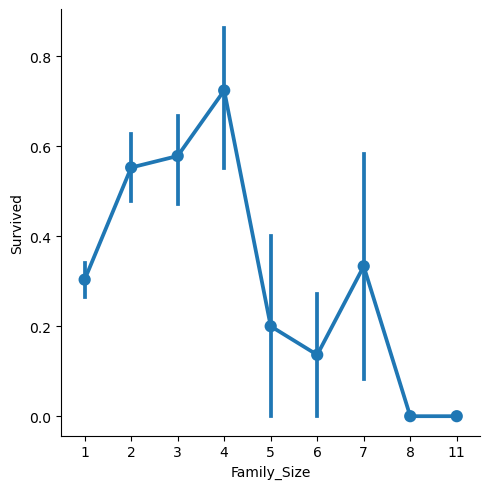

In [68]:
# Indeed, combine the Sibsp and Parch is better
sns.catplot(data=train_df,x='SibSp',y='Survived',kind='point')
sns.catplot(data=train_df,x='Parch',y='Survived',kind='point')
sns.catplot(data=train_df,x='Family_Size',y='Survived',kind='point')
plt.show()

In [69]:
print(train_df['Family_Size'].value_counts() / len(train_df))

Family_Size
1     0.602694
2     0.180696
3     0.114478
4     0.032548
6     0.024691
5     0.016835
7     0.013468
11    0.007856
8     0.006734
Name: count, dtype: float64


In [70]:
print('Pclass')
print(train_df['Pclass'].value_counts() / len(train_df))
print(test_df['Pclass'].value_counts() / len(test_df))
print('-------------------------------')

print('Sex')
print(train_df['Sex'].value_counts() / len(train_df))
print(test_df['Sex'].value_counts() / len(test_df))
print('-------------------------------')

print('Embarked')
print(train_df['Embarked'].value_counts() / len(train_df))
print(test_df['Embarked'].value_counts() / len(test_df))
print('-------------------------------')

Pclass
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: count, dtype: float64
Pclass
3    0.521531
1    0.255981
2    0.222488
Name: count, dtype: float64
-------------------------------
Sex
Sex
male      0.647587
female    0.352413
Name: count, dtype: float64
Sex
male      0.636364
female    0.363636
Name: count, dtype: float64
-------------------------------
Embarked
Embarked
S    0.725028
C    0.188552
Q    0.086420
Name: count, dtype: float64
Embarked
S    0.645933
C    0.244019
Q    0.110048
Name: count, dtype: float64
-------------------------------


### Predict Missing Age with KernelRidge

In [71]:
# combine train set and test set
data = pd.concat([train_df.drop('Survived',axis=1), test_df],axis=0, sort=False)

data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,3,male,22.0,1,0,7.2500,S,0,22.0,A5,NAN,Mr,2,0.383838,0
1,1,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,3,female,26.0,0,0,7.9250,S,0,26.0,Other_T,NAN,Miss,1,0.383838,0
3,1,female,35.0,1,0,53.1000,S,0,35.0,No,C,Mrs,2,0.383838,0
4,3,male,35.0,0,0,8.0500,S,0,35.0,No,NAN,Mr,1,0.383838,0


In [72]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [73]:
# encode variables into numeric labels
le = LabelEncoder()
column = ['Sex', 'Embarked', 'ticket_type', 'cabin_type', 'Title']

for col in column:
    data[col] = le.fit_transform(data[col])

data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,3,1,22.0,1,0,7.2500,2,0,22.0,0,5,2,2,0.383838,0
1,1,0,38.0,1,0,71.2833,0,0,38.0,4,2,3,2,1.000000,1
2,3,0,26.0,0,0,7.9250,2,0,26.0,3,5,1,1,0.383838,0
3,1,0,35.0,1,0,53.1000,2,0,35.0,2,2,3,2,0.383838,0
4,3,1,35.0,0,0,8.0500,2,0,35.0,2,5,2,1,0.383838,0


In [74]:
# drop columns that have information about age or are strongly correlated with other features
# avoid overfitting, so multicollinearity features need to be drop
data = data.drop(['Age_mean', 'Age_NA'], axis =1)

In [75]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,3,1,22.0,1,0,7.2500,2,0,5,2,2,0.383838,0
1,1,0,38.0,1,0,71.2833,0,4,2,3,2,1.000000,1
2,3,0,26.0,0,0,7.9250,2,3,5,1,1,0.383838,0
3,1,0,35.0,1,0,53.1000,2,2,2,3,2,0.383838,0
4,3,1,35.0,0,0,8.0500,2,2,5,2,1,0.383838,0


In [76]:
data['Age'].isnull().sum()

263

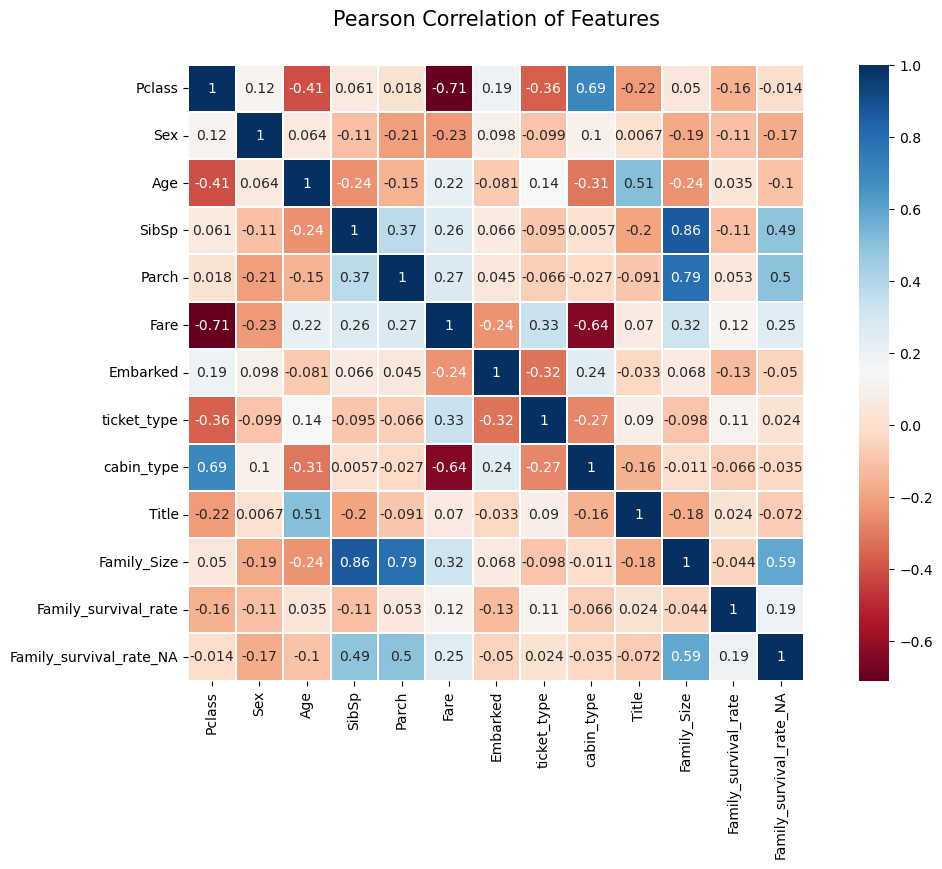

In [77]:
plt.figure(figsize=(14,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(numeric_only=True),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap='RdBu', annot=True)
plt.show()

In [78]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,3,1,22.0,1,0,7.2500,2,0,5,2,2,0.383838,0
1,1,0,38.0,1,0,71.2833,0,4,2,3,2,1.000000,1
2,3,0,26.0,0,0,7.9250,2,3,5,1,1,0.383838,0
3,1,0,35.0,1,0,53.1000,2,2,2,3,2,0.383838,0
4,3,1,35.0,0,0,8.0500,2,2,5,2,1,0.383838,0


In [79]:
X_train_age = data.dropna().drop('Age',axis=1)
y_train_age = data.dropna()['Age']

In [80]:
X_test_age = data[pd.isnull(data['Age'])].drop('Age',axis=1)

In [81]:
# kernelRidge combine kernel methods and Ridge Regression
# Kernel Ridge Regression combines these two methods. 
# It transforms the data using a kernel and then performs Ridge Regression in the transformed feature space.
# This approach is more effective for handling nonlinear problems, 
# while also controlling the complexity of the model and reducing the risk of overfitting.


model_lin = make_pipeline(StandardScaler(),KernelRidge())
kfold = model_selection.KFold(n_splits=10, random_state=4, shuffle = True)

parameters = {'kernelridge__gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'kernelridge__kernel': ['rbf', 'linear'],
               'kernelridge__alpha' :[0.001, 0.01, 0.1, 1, 10, 100, 1000],}

search_lin = GridSearchCV(model_lin, parameters, n_jobs=-1, cv=kfold, scoring='r2', verbose=1)
search_lin.fit(X_train_age,y_train_age)

Fitting 10 folds for each of 98 candidates, totalling 980 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kernelridge', KernelRidge())]),
             n_jobs=-1,
             param_grid={'kernelridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000],
                         'kernelridge__gamma': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000],
                         'kernelridge__kernel': ['rbf', 'linear']},
             scoring='r2', verbose=1)

In [82]:
print("Best parameters are:", search_lin.best_params_)
print("Best accuracy achieved:",search_lin.cv_results_['mean_test_score'].mean())

Best parameters are: {'kernelridge__alpha': 0.1, 'kernelridge__gamma': 0.01, 'kernelridge__kernel': 'rbf'}
Best accuracy achieved: -2.7263078845938513


In [83]:
y_test_age = search_lin.predict(X_test_age)

In [84]:
train_df.shape[0]

891

In [85]:
# reassign the training set and test set
idx = int(train_df.shape[0])
train_df['Age'] = data.iloc[:idx]['Age']
test_df['Age'] = data.iloc[idx:]['Age']

In [86]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,male,22.0,1,0,7.2500,S,0,22.0,A5,NAN,Mr,2,0.383838,0
1,1,1,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,0,0,7.9250,S,0,26.0,Other_T,NAN,Miss,1,0.383838,0
3,1,1,female,35.0,1,0,53.1000,S,0,35.0,No,C,Mrs,2,0.383838,0
4,0,3,male,35.0,0,0,8.0500,S,0,35.0,No,NAN,Mr,1,0.383838,0


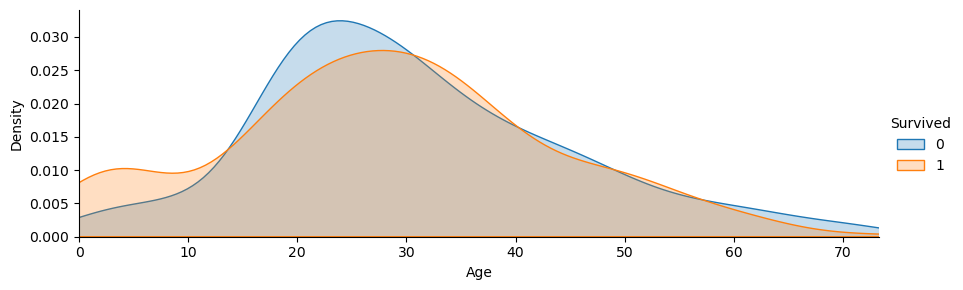

In [87]:
# plot distribution of available Age vs survival rate
g = sns.FacetGrid(train_df, hue = 'Survived', aspect=3)
g.map(sns.kdeplot, 'Age', shade= True )
g.set(xlim=(0 , train_df['Age'].max()))
g.add_legend()
plt.show()

### Feature correlation and Dependence

In [88]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,male,22.0,1,0,7.2500,S,0,22.0,A5,NAN,Mr,2,0.383838,0
1,1,1,female,38.0,1,0,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,26.0,0,0,7.9250,S,0,26.0,Other_T,NAN,Miss,1,0.383838,0
3,1,1,female,35.0,1,0,53.1000,S,0,35.0,No,C,Mrs,2,0.383838,0
4,0,3,male,35.0,0,0,8.0500,S,0,35.0,No,NAN,Mr,1,0.383838,0


In [89]:
# encode 'cabin_type' into numeric labels
le = LabelEncoder()
train_df_LE = train_df.copy()
test_df_LE = test_df.copy()

columns = ['Sex', 'Embarked', 'ticket_type', 'cabin_type', 'Title']

for col in columns:
    le.fit(train_df_LE[col])
    train_df_LE[col] = le.fit_transform(train_df_LE[col])
    test_df_LE[col] = le.transform(test_df_LE[col])
    
train_df_LE.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,1,22.0,1,0,7.2500,2,0,22.0,0,5,2,2,0.383838,0
1,1,1,0,38.0,1,0,71.2833,0,0,38.0,4,2,3,2,1.000000,1
2,1,3,0,26.0,0,0,7.9250,2,0,26.0,3,5,1,1,0.383838,0
3,1,1,0,35.0,1,0,53.1000,2,0,35.0,2,2,3,2,0.383838,0
4,0,3,1,35.0,0,0,8.0500,2,0,35.0,2,5,2,1,0.383838,0


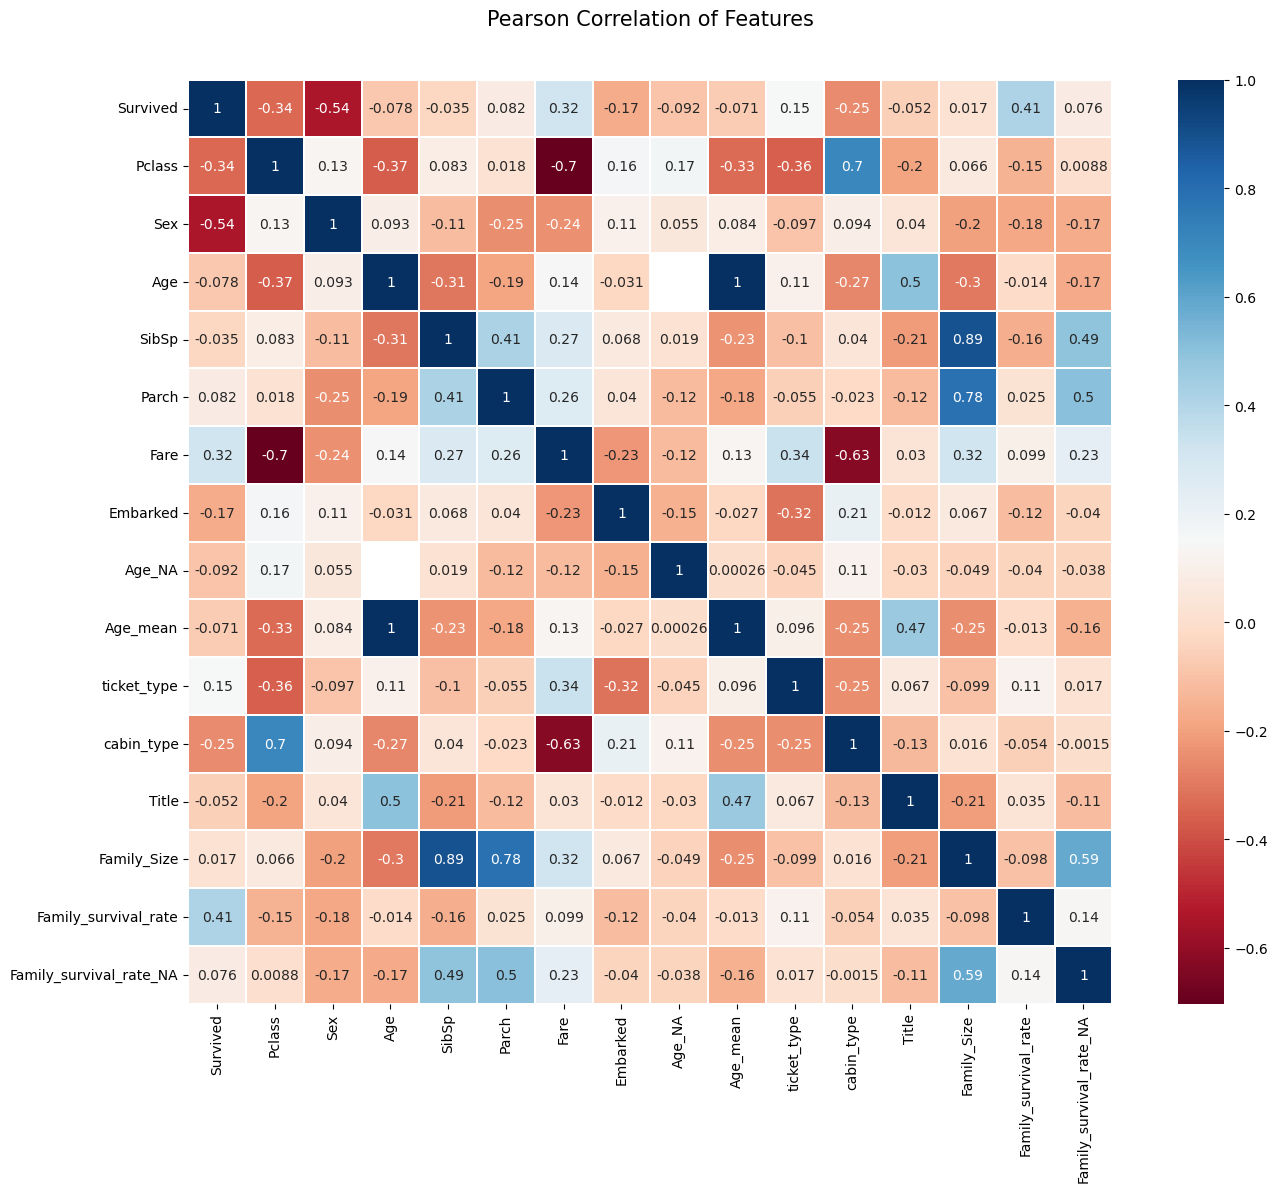

In [90]:
plt.figure(figsize=(17,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df_LE.corr(numeric_only=True),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap='RdBu', annot=True)
plt.show()

In [91]:
train_df_LE.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_NA', 'Age_mean', 'ticket_type', 'cabin_type', 'Title',
       'Family_Size', 'Family_survival_rate', 'Family_survival_rate_NA'],
      dtype='object')

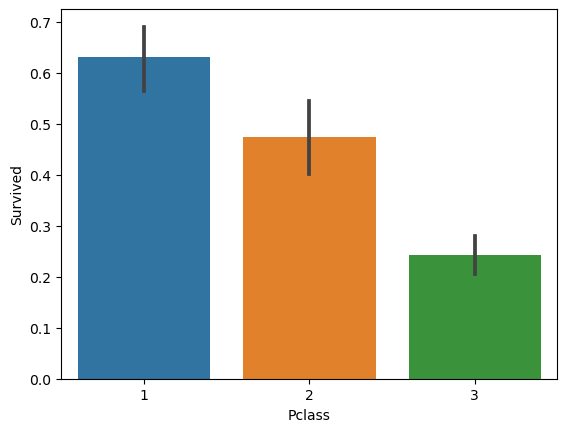

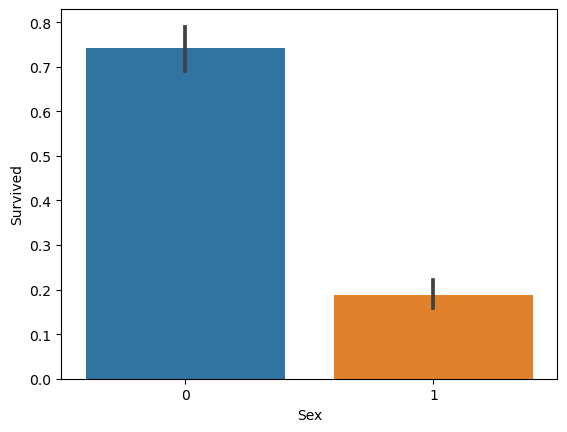

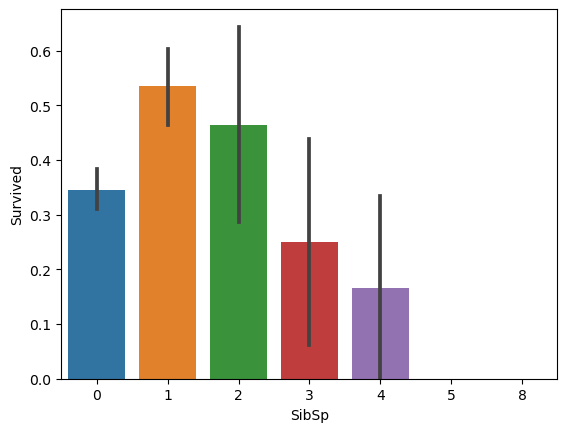

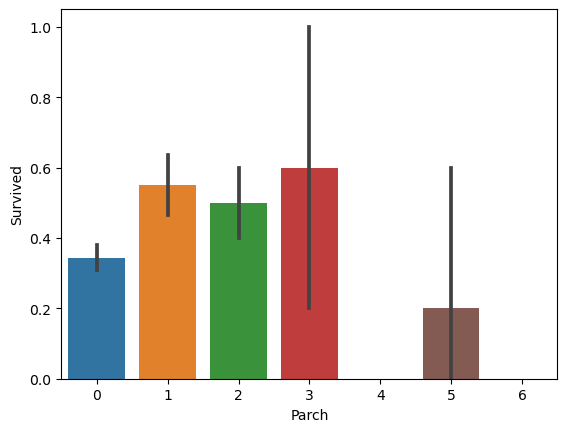

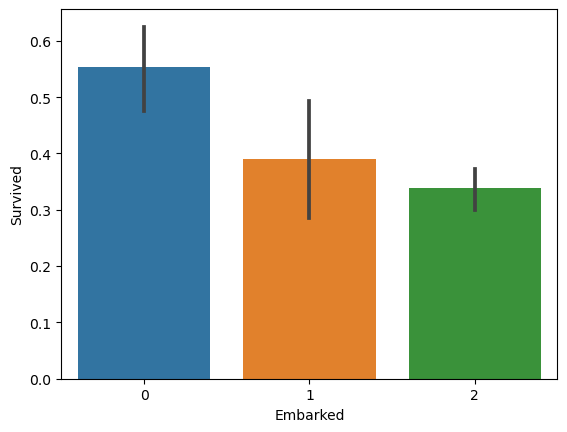

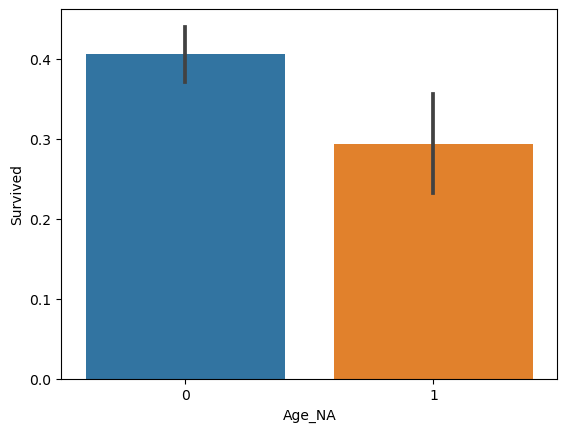

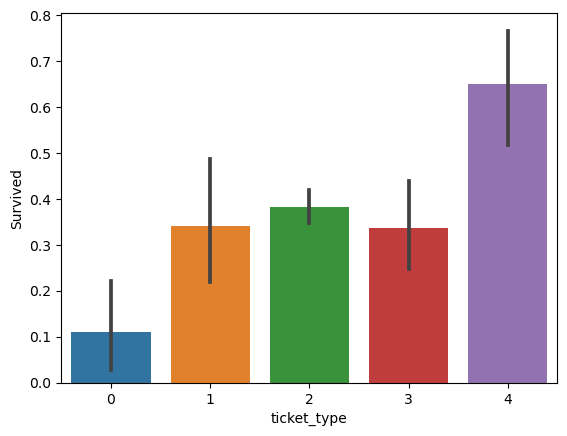

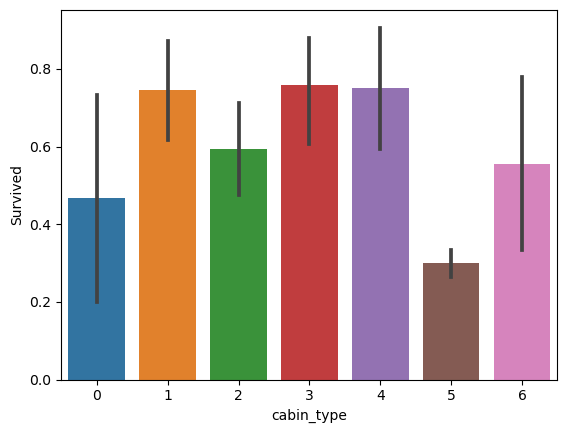

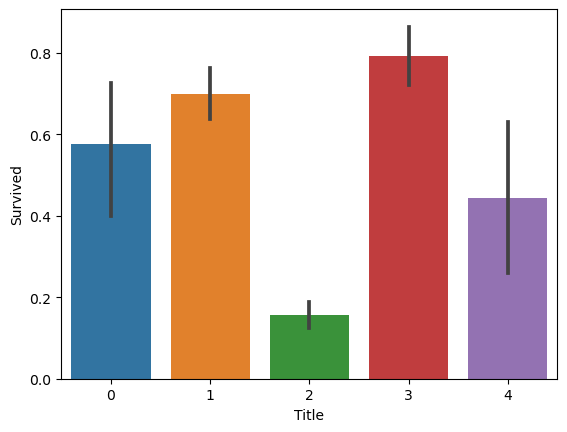

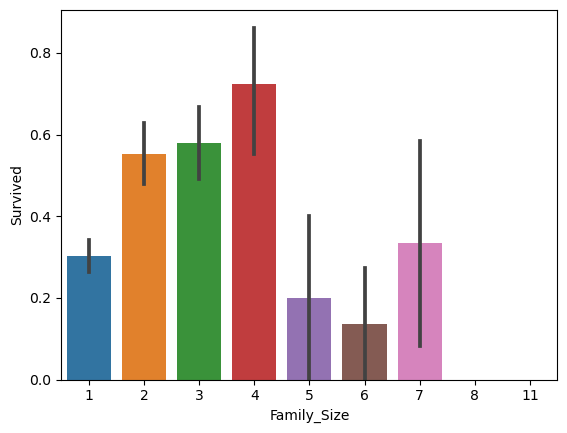

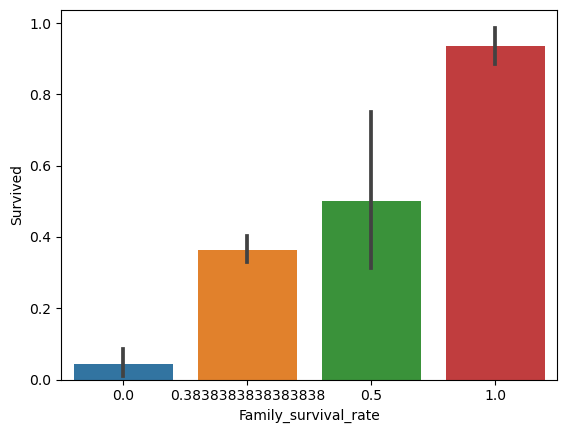

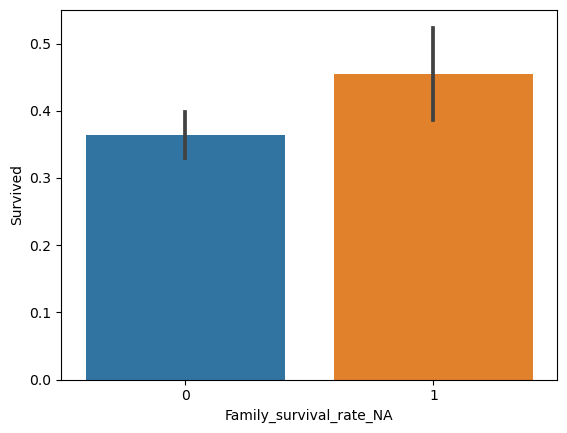

In [92]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked', 'Age_NA', 'ticket_type', 'cabin_type', 'Title',
       'Family_Size', 'Family_survival_rate', 'Family_survival_rate_NA']:
    
    sns.barplot(data=train_df_LE, x=col, y='Survived')
    plt.show()

In [93]:
# SibSp and Parch is correlated with family size, so will drop it
# Age and Age_mean is highly correlated, Age as is has less correlation with Survived, so will drop it
drop_cols = ['Age','SibSp','Parch']
train_df_LE = train_df_LE.drop(drop_cols,axis=1)
test_df_LE = test_df_LE.drop(drop_cols,axis=1)

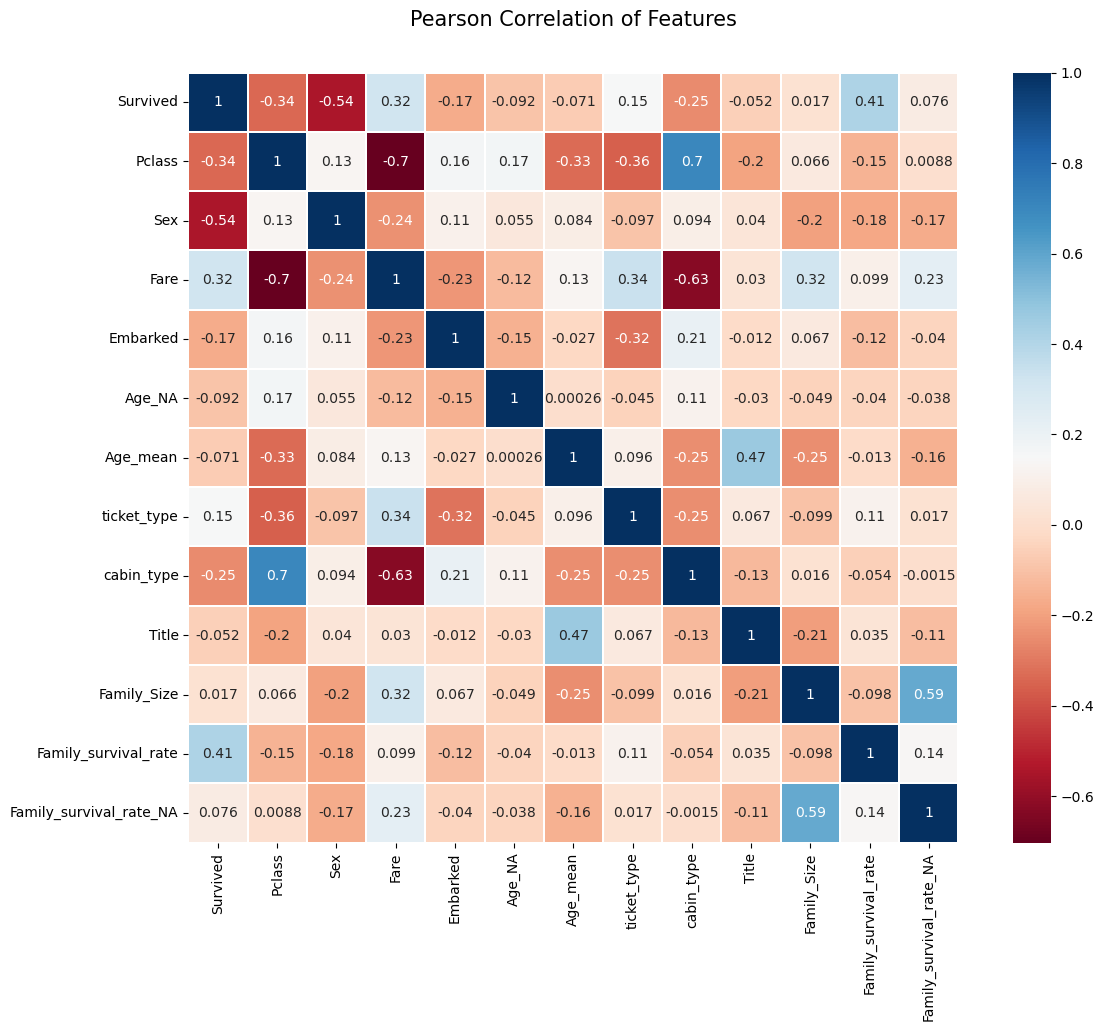

In [94]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df_LE.corr(numeric_only=True),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap='RdBu', annot=True)
plt.show()

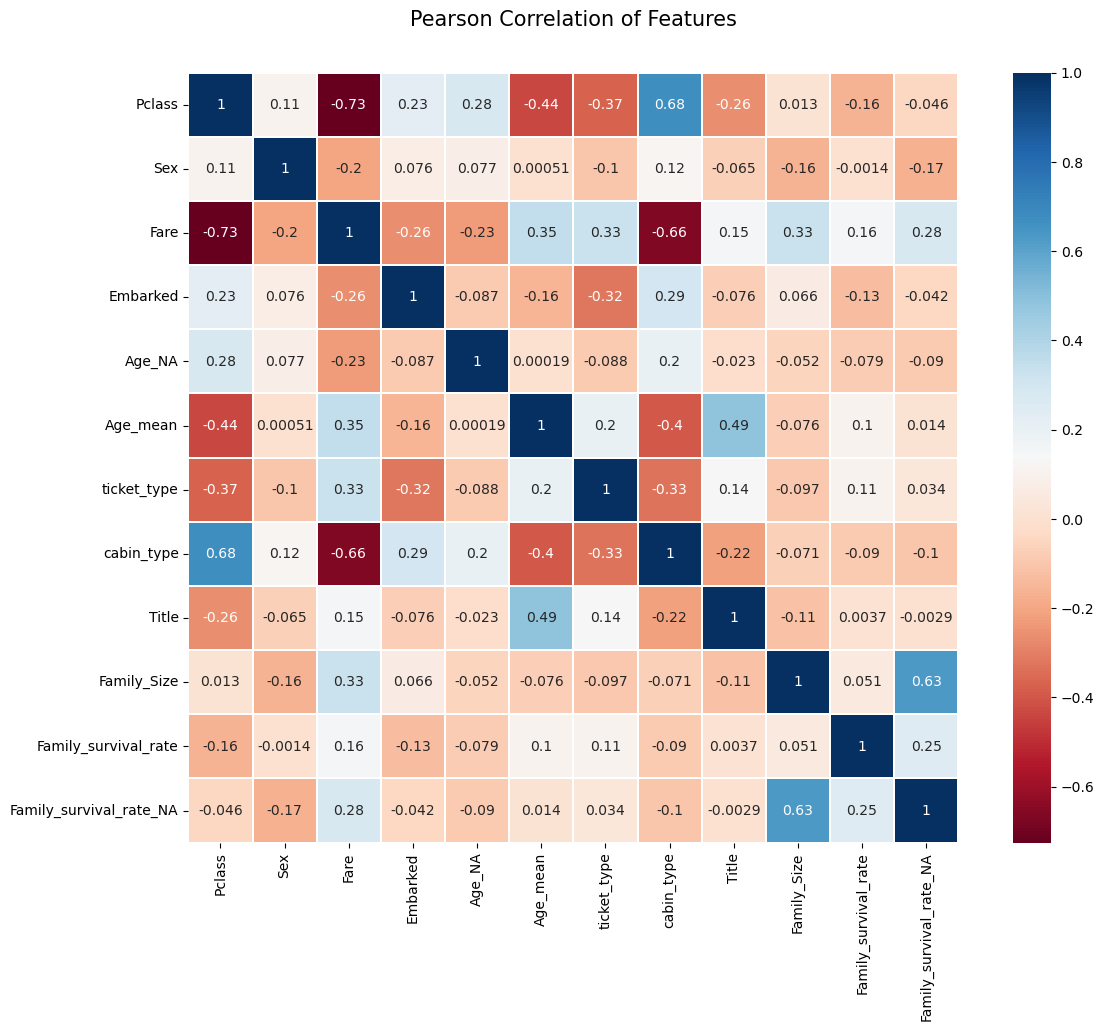

In [95]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(test_df_LE.corr(numeric_only=True),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap='RdBu', annot=True)
plt.show()

# Feature Encoding
## There are several ways

### 1. One-Hot Encoder

In [96]:
X_train_onehot = train_df.drop(drop_cols,axis=1)
X_test_onehot = test_df.drop(drop_cols,axis=1)

In [97]:
X_train_onehot.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,male,7.2500,S,0,22.0,A5,NAN,Mr,2,0.383838,0
1,1,1,female,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,7.9250,S,0,26.0,Other_T,NAN,Miss,1,0.383838,0
3,1,1,female,53.1000,S,0,35.0,No,C,Mrs,2,0.383838,0
4,0,3,male,8.0500,S,0,35.0,No,NAN,Mr,1,0.383838,0


In [98]:
columns = ['Pclass','Sex','Embarked','ticket_type','cabin_type','Title']

for col in columns:
    X_train_onehot = pd.concat([X_train_onehot, pd.get_dummies(X_train_onehot[col],drop_first=True).astype(int)],axis=1)
    X_test_onehot = pd.concat([X_test_onehot, pd.get_dummies(X_test_onehot[col],drop_first=True).astype(int)],axis=1)

In [99]:
X_train_onehot = X_train_onehot.drop(columns,axis=1)
X_test_onehot = X_test_onehot.drop(columns,axis=1)

In [100]:
X_train_onehot.head()

,Survived,Fare,Age_NA,Age_mean,Family_Size,Family_survival_rate,Family_survival_rate_NA,2,3,male,...,B,C,D,E,NAN,OTHER_C,Miss,Mr,Mrs,OTHER
0,0,7.2500,0,22.0,2,0.383838,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
1,1,71.2833,0,38.0,2,1.000000,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,7.9250,0,26.0,1,0.383838,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
3,1,53.1000,0,35.0,2,0.383838,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,8.0500,0,35.0,1,0.383838,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0


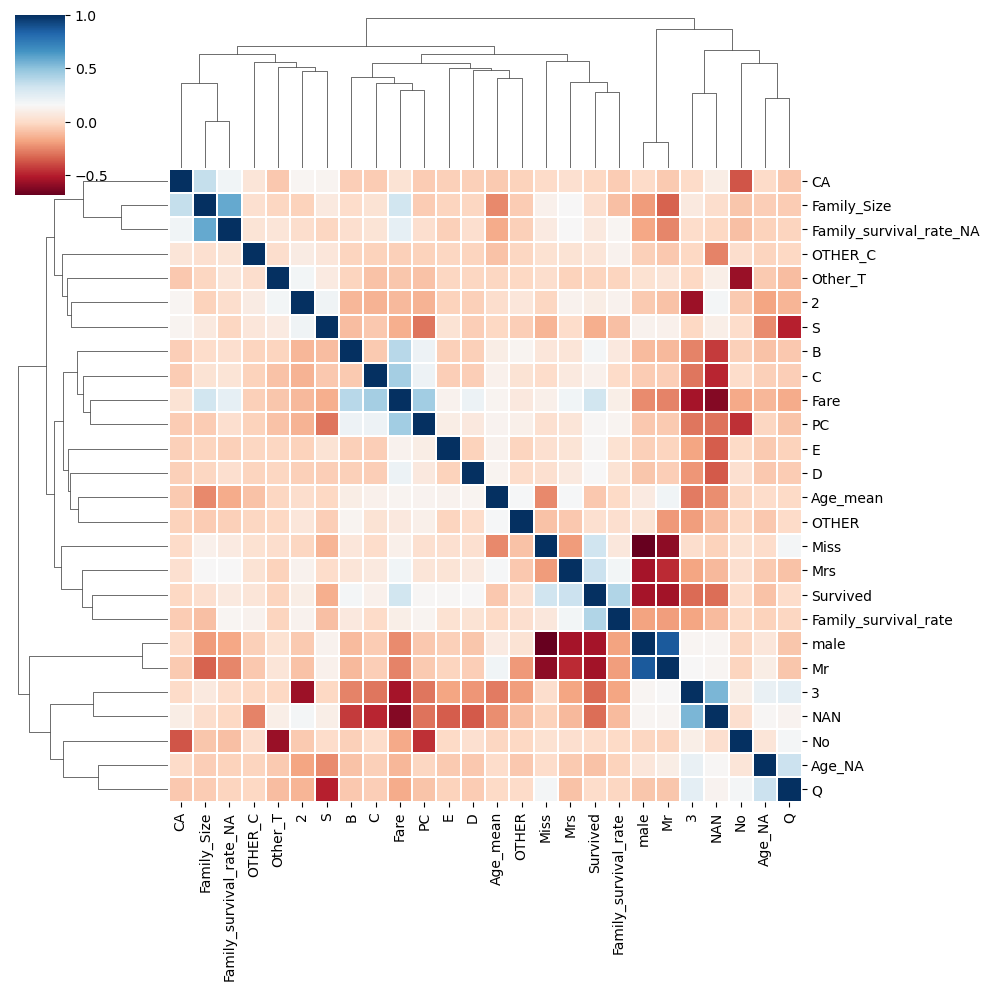

In [101]:
sns.clustermap(X_train_onehot.corr(numeric_only=True),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap='RdBu')
plt.show()

### 2. Label Encoder

In [102]:
X_train_lab = train_df.drop(drop_cols,axis=1)
X_test_lab = test_df.drop(drop_cols,axis=1)

In [103]:
X_train_lab.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,male,7.2500,S,0,22.0,A5,NAN,Mr,2,0.383838,0
1,1,1,female,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,7.9250,S,0,26.0,Other_T,NAN,Miss,1,0.383838,0
3,1,1,female,53.1000,S,0,35.0,No,C,Mrs,2,0.383838,0
4,0,3,male,8.0500,S,0,35.0,No,NAN,Mr,1,0.383838,0


In [104]:
# Encode the category to numeric
le = LabelEncoder()
columns = ['Sex', 'Embarked', 'ticket_type', 'cabin_type', 'Title']

for col in columns:
    le.fit(train_df[col])
    X_train_lab[col] = le.fit_transform(X_train_lab[col])
    X_test_lab[col] = le.transform(X_test_lab[col])

X_test_lab.head()

,Pclass,Sex,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,3,1,7.8292,1,0,34.5,2,5,2,1,0.383838,0
1,3,0,7.0000,2,0,47.0,2,5,3,2,0.383838,0
2,2,1,9.6875,1,0,62.0,2,5,2,1,0.383838,0
3,3,1,8.6625,2,0,27.0,2,5,2,1,0.383838,0
4,3,0,12.2875,2,0,22.0,2,5,3,3,1.000000,1


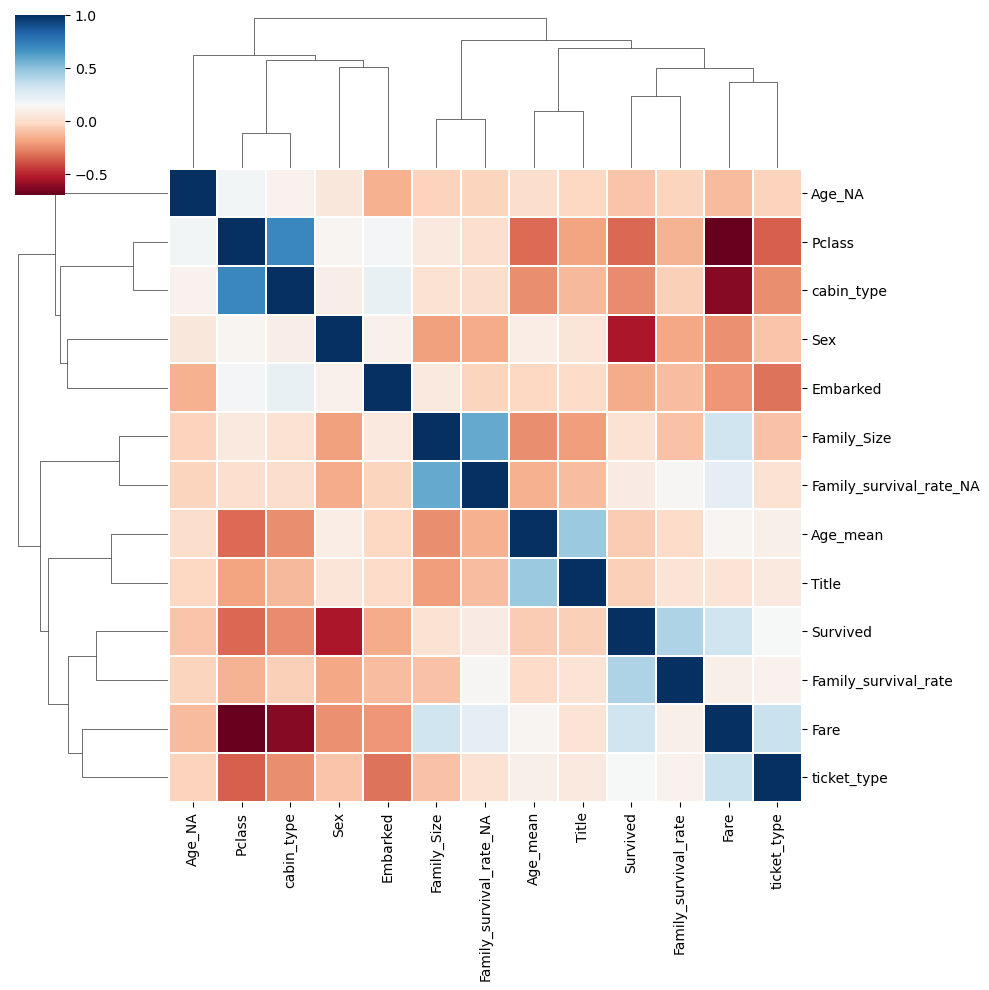

In [105]:
sns.clustermap(X_train_lab.corr(numeric_only=True),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap='RdBu')
plt.show()

### 3. Mean Encoder

In [106]:
X_train_mean = train_df.drop(drop_cols, axis=1)
X_test_mean = test_df.drop(drop_cols, axis=1)

In [107]:
X_train_mean.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,male,7.2500,S,0,22.0,A5,NAN,Mr,2,0.383838,0
1,1,1,female,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,7.9250,S,0,26.0,Other_T,NAN,Miss,1,0.383838,0
3,1,1,female,53.1000,S,0,35.0,No,C,Mrs,2,0.383838,0
4,0,3,male,8.0500,S,0,35.0,No,NAN,Mr,1,0.383838,0


In [108]:
columns = ['cabin_type', 'Title',  'Sex', 'Embarked', 'ticket_type']

for col in columns:
    ordered_labels = X_train_mean.groupby([col])['Survived'].mean().to_dict()
    X_train_mean[col] = X_train_mean[col].map(ordered_labels)
    X_test_mean[col] = X_test_mean[col].map(ordered_labels)

In [109]:
X_train_mean.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,0.188908,7.2500,0.339009,0,22.0,0.111111,0.299854,0.156673,2,0.383838,0
1,1,1,0.742038,71.2833,0.553571,0,38.0,0.650000,0.593220,0.792000,2,1.000000,1
2,1,3,0.742038,7.9250,0.339009,0,26.0,0.337079,0.299854,0.697802,1,0.383838,0
3,1,1,0.742038,53.1000,0.339009,0,35.0,0.383459,0.593220,0.792000,2,0.383838,0
4,0,3,0.188908,8.0500,0.339009,0,35.0,0.383459,0.299854,0.156673,1,0.383838,0


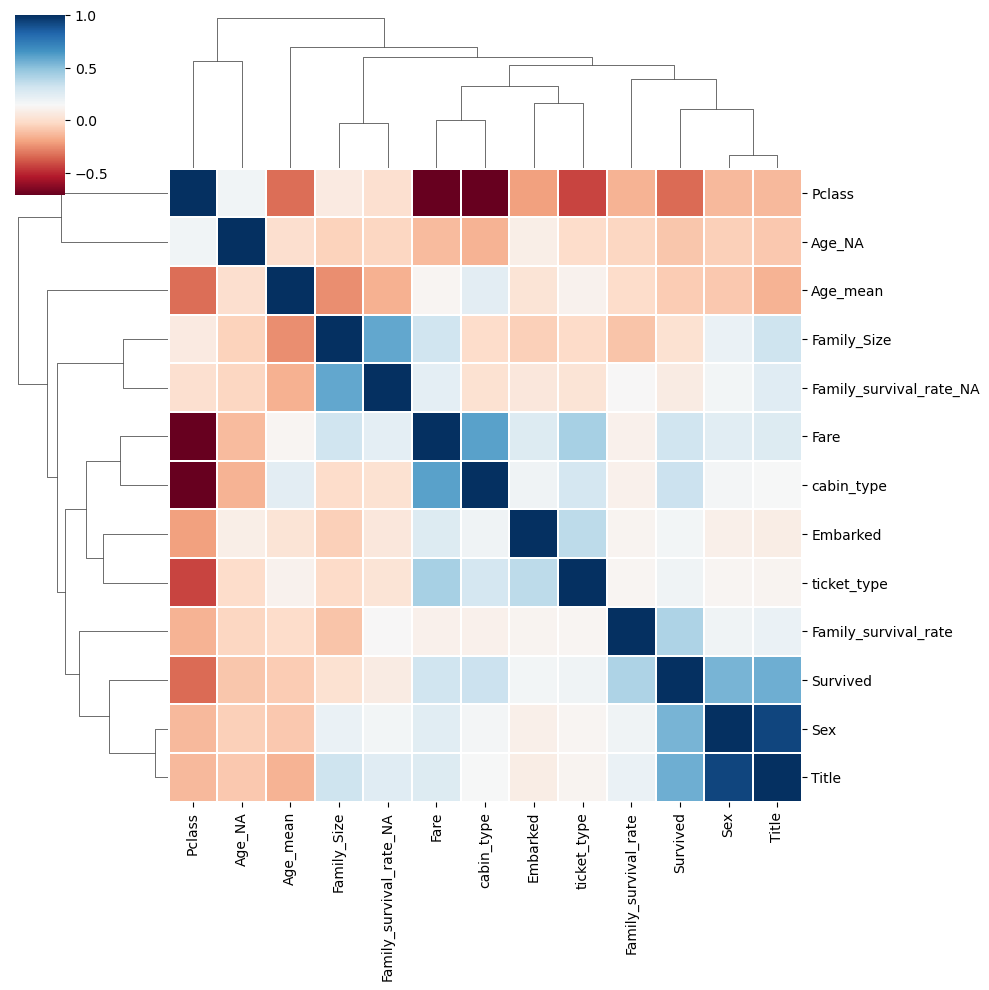

In [110]:
sns.clustermap(X_train_mean.corr(numeric_only=True),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap='RdBu')
plt.show()

### 4. Frequency Encoder

In [111]:
X_train_freq = train_df.drop(drop_cols,axis=1)
X_test_freq = test_df.drop(drop_cols,axis=1)

In [112]:
X_train_freq.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,male,7.2500,S,0,22.0,A5,NAN,Mr,2,0.383838,0
1,1,1,female,71.2833,C,0,38.0,PC,C,Mrs,2,1.000000,1
2,1,3,female,7.9250,S,0,26.0,Other_T,NAN,Miss,1,0.383838,0
3,1,1,female,53.1000,S,0,35.0,No,C,Mrs,2,0.383838,0
4,0,3,male,8.0500,S,0,35.0,No,NAN,Mr,1,0.383838,0


In [113]:
columns = ['cabin_type', 'Title',  'Sex', 'Embarked', 'ticket_type']

for col in columns:
    ordered_labels = X_train_freq[col].value_counts().to_dict()
    X_train_freq[col] = X_train_freq[col].map(ordered_labels)
    X_test_freq[col] = X_test_freq[col].map(ordered_labels)

In [114]:
X_train_freq.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_NA,Age_mean,ticket_type,cabin_type,Title,Family_Size,Family_survival_rate,Family_survival_rate_NA
0,0,3,577,7.2500,646,0,22.0,36,687,517,2,0.383838,0
1,1,1,314,71.2833,168,0,38.0,60,59,125,2,1.000000,1
2,1,3,314,7.9250,646,0,26.0,89,687,182,1,0.383838,0
3,1,1,314,53.1000,646,0,35.0,665,59,125,2,0.383838,0
4,0,3,577,8.0500,646,0,35.0,665,687,517,1,0.383838,0


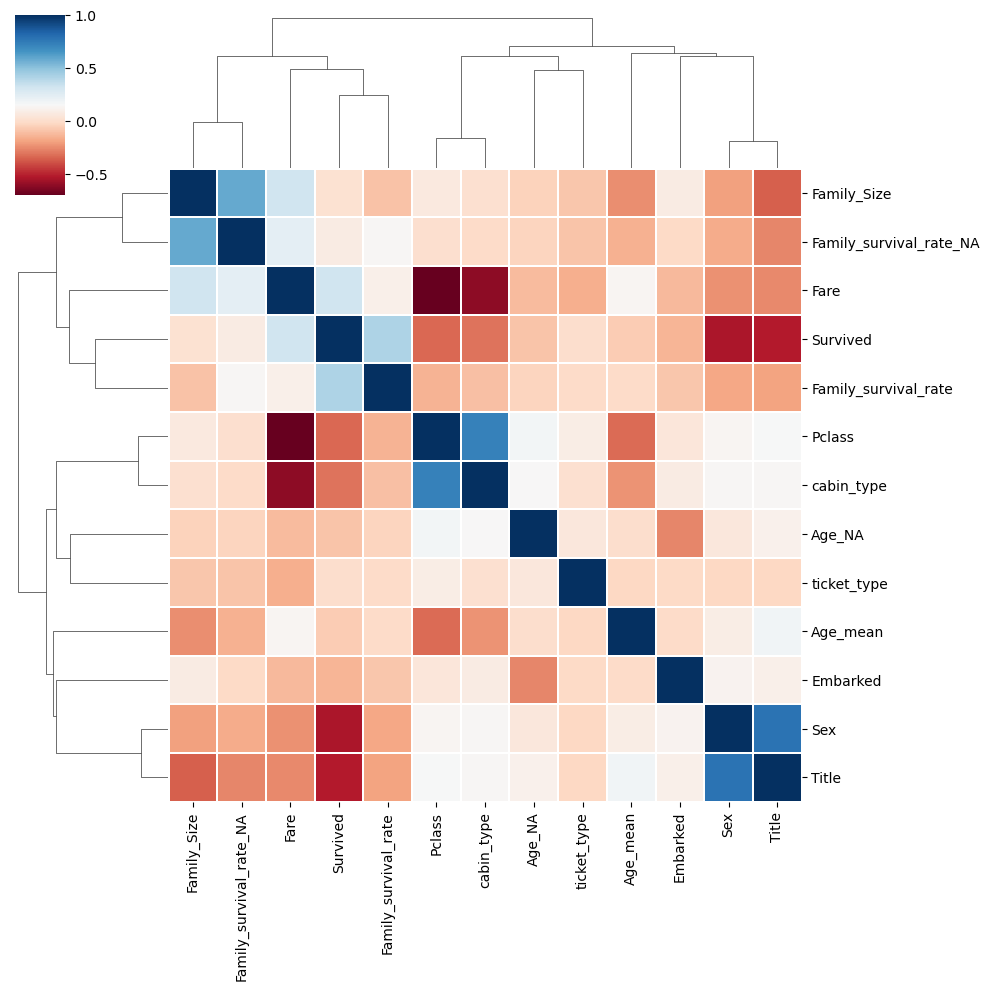

In [115]:
sns.clustermap(X_train_freq.corr(numeric_only=True),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap='RdBu')
plt.show()

# 7. Modeling

In [116]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR

In [117]:
random_state = 4

In [118]:
# StratifiedKFold is better using at imbalanced data and classification
kfold = StratifiedKFold(n_splits=5)

In [119]:
# seperate data into X_train and y_train
def seperate(X_train):
    X = X_train.drop('Survived',axis=1)
    y = X_train['Survived']
    return X,y

In [120]:
X_onehot, y_onehot = seperate(X_train_onehot)
X_lab, y_lab = seperate(X_train_lab)
X_mean, y_mean = seperate(X_train_mean)
X_freq, y_freq = seperate(X_train_freq)

### Evaluate the Models

In [121]:
# two ways debug the errors
# 1. convert to string: X_onehot.columns = X_onehot.columns.astype(str) 
# 2. turn to values: X_onehot.values
random_state = 4
classifiers = []


classifiers.append(('SVC', make_pipeline(StandardScaler(),SVC(random_state=random_state))))
classifiers.append(('DecisionTree', DecisionTreeClassifier(random_state=random_state)))
classifiers.append(('AdaBoost', AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),\
                                                  random_state=random_state,learning_rate=0.1)))
classifiers.append(('RandomForest', RandomForestClassifier(random_state=random_state)))
classifiers.append(('GradientBoost', GradientBoostingClassifier(random_state=random_state)))
classifiers.append(('KNN',make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=7))))

results = []
classifier_names = []
X_onehot.columns = X_onehot.columns.astype(str) 

for name,classifier in classifiers:
    kfold = KFold(n_splits= 3, random_state=random_state, shuffle = True)
    cv_results = cross_val_score(classifier, X_onehot, y_onehot, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    classifier_names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVC: 0.824916 (0.019244)
DecisionTree: 0.791246 (0.028702)
AdaBoost: 0.782267 (0.020997)
RandomForest: 0.830527 (0.024640)
GradientBoost: 0.836139 (0.029137)
KNN: 0.809203 (0.033256)


In [122]:
X_test_onehot.isnull().sum()

Fare                       1
Age_NA                     0
Age_mean                   0
Family_Size                0
Family_survival_rate       0
Family_survival_rate_NA    0
2                          0
3                          0
male                       0
Q                          0
S                          0
CA                         0
No                         0
Other_T                    0
PC                         0
B                          0
C                          0
D                          0
E                          0
NAN                        0
OTHER_C                    0
Miss                       0
Mr                         0
Mrs                        0
OTHER                      0
dtype: int64

In [123]:
print(test_df[test_df['Fare'].isnull()].index)

Index([152], dtype='int64')


In [124]:
fare_index = test_df['Fare'].mean()
fare_ind = test_df['Fare'].fillna(fare_index)
X_test_onehot = X_test_onehot.fillna(fare_index)
X_test_lab = X_test_lab.fillna(fare_index)
X_test_mean = X_test_mean.fillna(fare_index)
X_test_freq = X_test_freq.fillna(fare_index)

### RandomForest

In [125]:
def random_forest(X, y, X_test):
    
    parameters = {'max_depth': [2,4,5,10],'n_estimators': [200,500,1000,2000],'min_samples_split': [3,4,5]}
    kfold = KFold(n_splits=3, random_state=4, shuffle=True)
    rfc = RandomForestClassifier(random_state=4, n_jobs=-1)
    grid_rfc = GridSearchCV(rfc, parameters, n_jobs=-1, cv=kfold, scoring='accuracy', verbose=1)
    grid_rfc.fit(X, y)
    predictions = grid_rfc.predict(X_test)
    
    print("Best parameters are:", grid_rfc.best_params_)
    print("Best accuracy achieved:", grid_rfc.best_score_)
    
    return grid_rfc.best_params_, rfc, grid_rfc, predictions

In [126]:
X_onehot.columns = X_onehot.columns.astype(str)
X_lab.columns = X_lab.columns.astype(str)
X_mean.columns = X_mean.columns.astype(str)
X_freq.columns = X_freq.columns.astype(str)

param_rfc_onehot, model_rfc_onehot, grid_rfc_onehot, prediction_cv_rfc_onehot = random_forest(X_onehot.values, y_onehot, X_test_onehot.values)
param_rfc_lab, model_rfc_lab, search_rfc_lab, prediction_cv_rfc_lab = random_forest(X_lab.values, y_lab, X_test_lab.values)
param_rfc_mean, model_rfc_mean, search_rfc_mean, prediction_cv_rfc_mean = random_forest(X_mean.values, y_mean,  X_test_mean.values)
param_rfc_freq, model_rfc_freq, search_rfc_freq, prediction_cv_rfc_freq = random_forest(X_freq.values, y_freq, X_test_freq.values)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters are: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 200}
Best accuracy achieved: 0.8484848484848485
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters are: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 200}
Best accuracy achieved: 0.8462401795735128
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters are: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best accuracy achieved: 0.8529741863075196
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best parameters are: {'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 500}
Best accuracy achieved: 0.8518518518518517


In [127]:
def fit_pred_RF(X,y,X_test):
    rfc = RandomForestClassifier(n_estimators=2000, max_depth=2, min_samples_split=3,
                                random_state=4, n_jobs=-1)
    rfc.fit(X,y)
    prediction = rfc.predict(X_test)
    
    return prediction, rfc

In [128]:
X_onehot.columns = X_onehot.columns.astype(str)
X_lab.columns = X_lab.columns.astype(str)
X_mean.columns = X_mean.columns.astype(str)
X_freq.columns = X_freq.columns.astype(str)

prediction_rfc_onehot, model_rfc_onehot = fit_pred_RF(X_onehot.values, y_onehot, X_test_onehot.values)
prediction_rfc_lab, model_rfc_lab = fit_pred_RF(X_lab.values, y_lab, X_test_lab.values)
prediction_rfc_mean, model_rfc_mean = fit_pred_RF(X_mean.values, y_mean, X_test_mean.values)
prediction_rfc_freq, model_rfc_freq = fit_pred_RF(X_freq.values, y_freq, X_test_freq.values)

In [143]:
feats = model_rfc_onehot.feature_importances_
imp_feats = pd.DataFrame(index=X_onehot.columns, data=feats, columns=['Importance']).sort_values('Importance',ascending=False)
imp_feats

,Importance
Mr,0.241711
male,0.234709
Family_survival_rate,0.122908
Mrs,0.076230
3,0.068388
Miss,0.065622
NAN,0.064780
Fare,0.055568
Family_Size,0.024229
Age_mean,0.012269


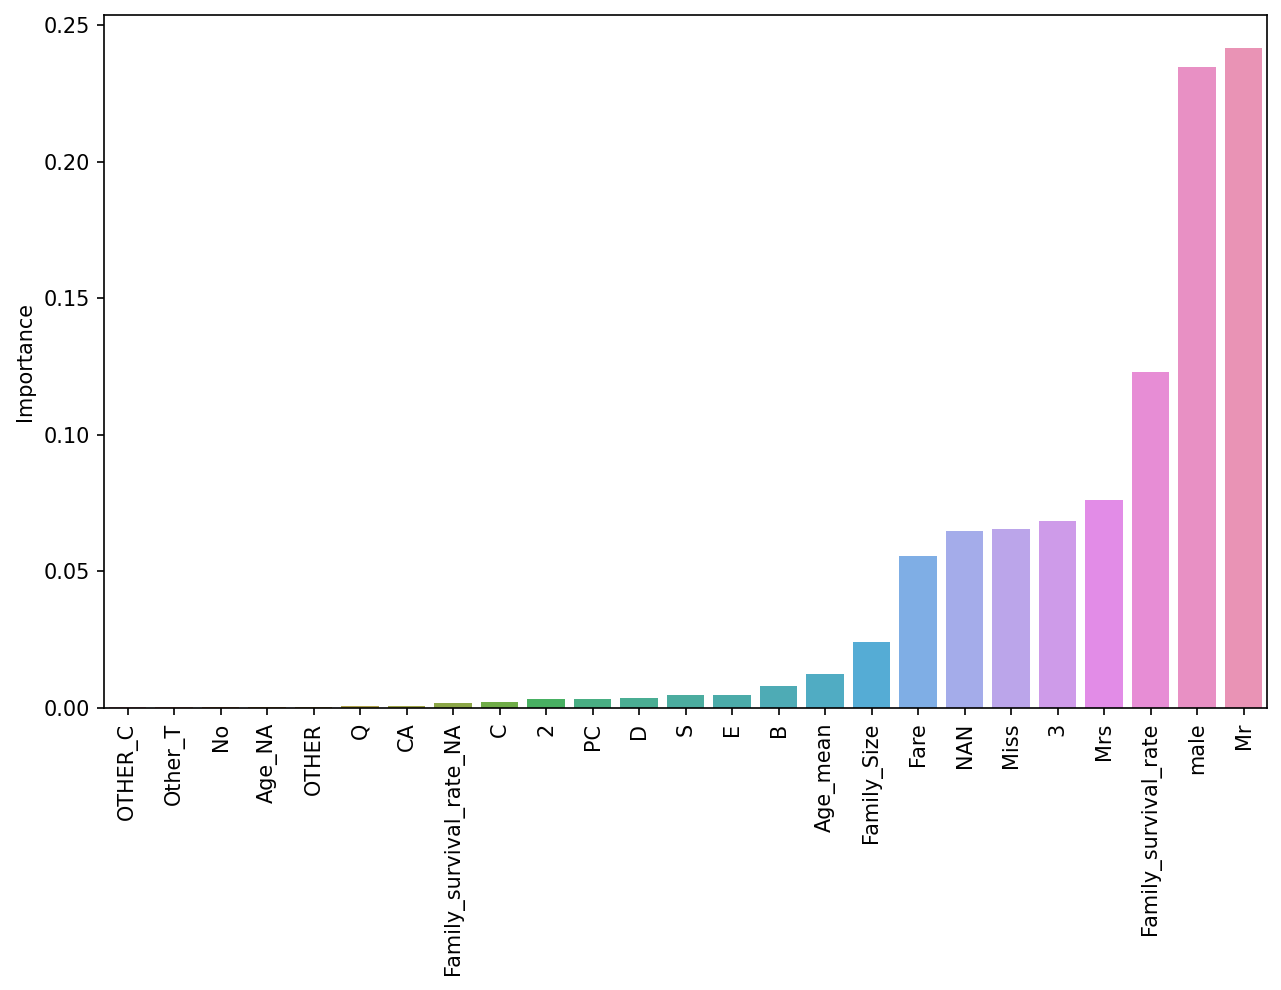

In [149]:
plt.figure(figsize=(10,6),dpi=150)
imp_feats = pd.DataFrame(index=X_onehot.columns, data=feats, columns=['Importance']).sort_values('Importance')
sns.barplot(data=imp_feats, x=imp_feats.index, y='Importance')
plt.xticks(rotation=90)
plt.show()

### GradientBoost

In [130]:
def grad_boost(X, y, X_test):
    
    parameters = {'max_depth' : [2, 4, 10, 15], 'n_estimators' : [10, 50, 100], 'min_samples_split' : [5, 10, 15]}
    kfold = KFold(n_splits=3, random_state=random_state, shuffle = True)
    GBC = GradientBoostingClassifier(random_state=4)
    grid_GBC = GridSearchCV(GBC, parameters, n_jobs = -1, cv = kfold, scoring = 'accuracy',verbose=1)
    grid_GBC.fit(X, y)
    predictions = grid_GBC.predict(X_test)
    
    print("Best parameters are:", grid_GBC.best_params_)
    print("Best accuracy achieved:",grid_GBC.cv_results_['mean_test_score'].mean())
    
    return grid_GBC.best_params_, grid_GBC, grad_boost, predictions

In [131]:
X_onehot.columns = X_onehot.columns.astype(str)
X_lab.columns = X_lab.columns.astype(str)
X_mean.columns = X_mean.columns.astype(str)
X_freq.columns = X_freq.columns.astype(str)

param_GBC_onehot, model_GBC_onehot, grid_GBC_onehot, prediction_cv_GBC_onehot = grad_boost(X_onehot.values, y_onehot, X_test_onehot.values)
param_GBC_lab, model_GBC_lab, search_GBC_lab, prediction_cv_GBC_lab = grad_boost(X_lab.values, y_lab, X_test_lab.values)
param_GBC_mean, model_GBC_mean, search_GBC_mean, prediction_cv_GBC_mean = grad_boost(X_mean.values, y_mean,  X_test_mean.values)
param_GBC_freq, model_GBC_freq, search_GBC_freq, prediction_cv_GBC_freq = grad_boost(X_freq.values, y_freq, X_test_freq.values)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters are: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best accuracy achieved: 0.8227958598328969
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters are: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best accuracy achieved: 0.8286257638109489
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters are: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best accuracy achieved: 0.8278775408405037
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters are: {'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best accuracy achieved: 0.8243546576879909


In [132]:
def fit_pred_GBC(X, Y, X_test):

    GBC = GradientBoostingClassifier(max_depth = 2, min_samples_split = 15, n_estimators = 10,\
                                 random_state = 4, max_features= 'sqrt')
    GBC.fit(X, Y)
    
    prediction = GBC.predict(X_test)
    
    return prediction, GBC

In [133]:
X_onehot.columns = X_onehot.columns.astype(str)
X_lab.columns = X_lab.columns.astype(str)
X_mean.columns = X_mean.columns.astype(str)
X_freq.columns = X_freq.columns.astype(str)

prediction_GBC_onehot, model_GBC_onehot = fit_pred_GBC(X_onehot.values, y_onehot, X_test_onehot.values)
prediction_GBC_lab, model_GBC_lab = fit_pred_GBC(X_lab.values, y_lab, X_test_lab.values)
prediction_GBC_mean, model_GBC_mean = fit_pred_GBC(X_mean.values, y_mean, X_test_mean.values)
prediction_GBC_freq, model_GBC_freq = fit_pred_GBC(X_freq.values, y_freq, X_test_freq.values)

In [134]:
pd.Series(model_GBC_onehot.feature_importances_, X_onehot.columns).sort_values(ascending=False)

Mr                         0.248551
male                       0.219918
Family_survival_rate       0.202363
Mrs                        0.089963
3                          0.072880
NAN                        0.071063
Fare                       0.051328
Age_mean                   0.013048
2                          0.012454
Family_Size                0.006370
Miss                       0.005449
B                          0.004942
Family_survival_rate_NA    0.001672
D                          0.000000
OTHER_C                    0.000000
E                          0.000000
No                         0.000000
C                          0.000000
PC                         0.000000
Other_T                    0.000000
Age_NA                     0.000000
CA                         0.000000
S                          0.000000
Q                          0.000000
OTHER                      0.000000
dtype: float64

### KNN

In [135]:
def mod_KNN(X, y, X_test):
    
    model_KNN=make_pipeline(MinMaxScaler(),KNeighborsClassifier())
    
    #KNN.get_params().keys()
    kfold = KFold(n_splits=3, random_state=random_state, shuffle = True)
    parameters=[{'kneighborsclassifier__n_neighbors': [2,3,4,5,6,7,8,9,10]}]
    grid_KNN = GridSearchCV(model_KNN, param_grid=parameters, scoring='accuracy', cv=kfold)
    scores_KNN=cross_val_score(grid_KNN, X, y,scoring='accuracy', cv=kfold, verbose=1)
    grid_KNN.fit(X, y)
    prediction= grid_KNN.predict(X_test)
    
    print("Best parameters are:", grid_KNN.best_params_)
    print("Best accuracy achieved:", grid_KNN.cv_results_['mean_test_score'].mean())
    
    return grid_KNN.best_params_, model_KNN, grid_KNN, prediction

In [136]:
X_onehot.columns = X_onehot.columns.astype(str)
X_lab.columns = X_lab.columns.astype(str)
X_mean.columns = X_mean.columns.astype(str)
X_freq.columns = X_freq.columns.astype(str)

param_KNN_onehot, model_KNN_onehot, grid_KNN_onehot, prediction_cv_KNN_onehot = mod_KNN(X_onehot.values, y_onehot, X_test_onehot.values)
param_KNN_lab, model_KNN_lab, search_KNN_lab, prediction_cv_KNN_lab = mod_KNN(X_lab.values, y_lab, X_test_lab.values)
param_KNN_mean, model_KNN_mean, search_KNN_mean, prediction_cv_KNN_mean = mod_KNN(X_mean.values, y_mean,  X_test_mean.values)
param_KNN_freq, model_KNN_freq, search_KNN_freq, prediction_cv_KNN_freq = mod_KNN(X_freq.values, y_freq, X_test_freq.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters are: {'kneighborsclassifier__n_neighbors': 10}
Best accuracy achieved: 0.8047138047138047


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished


Best parameters are: {'kneighborsclassifier__n_neighbors': 10}
Best accuracy achieved: 0.8259134555430852


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished


Best parameters are: {'kneighborsclassifier__n_neighbors': 8}
Best accuracy achieved: 0.8201770794363388


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished


Best parameters are: {'kneighborsclassifier__n_neighbors': 8}
Best accuracy achieved: 0.8296545703953111


In [137]:
def fit_pred_KNN(X, y, X_test):

    model_KNN = make_pipeline(MinMaxScaler(),KNeighborsClassifier(n_neighbors=11))
    
    model_KNN.fit(X, y)
    
    prediction= model_KNN.predict(X_test)
    
    return prediction, model_KNN

In [138]:
X_onehot.columns = X_onehot.columns.astype(str)
X_lab.columns = X_lab.columns.astype(str)
X_mean.columns = X_mean.columns.astype(str)
X_freq.columns = X_freq.columns.astype(str)

prediction_KNN_onehot, model_KNN_onehot = fit_pred_KNN(X_onehot.values, y_onehot, X_test_onehot.values)
prediction_KNN_lab, model_KNN_lab = fit_pred_KNN(X_lab.values, y_lab, X_test_lab.values)
prediction_KNN_mean, model_KNN_mean = fit_pred_KNN(X_mean.values, y_mean, X_test_mean.values)
prediction_KNN_freq, model_KNN_freq = fit_pred_KNN(X_freq.values, y_freq, X_test_freq.values)

### SVC

In [139]:
def mod_SVC(X, y, X_test):

    model_SVC=make_pipeline(StandardScaler(),SVC(random_state=1))
    parameters=[{'svc__C': [0.0001,0.001,0.1,1, 10, 100], 
           'svc__gamma':[0.0001,0.001,0.1,1,10,50,100],
           'svc__kernel':['rbf'],
           'svc__degree' : [1,2,3,4]
          }]
    kfold = KFold(n_splits=3, random_state=random_state, shuffle = True)
    grid_SVC = GridSearchCV(model_SVC, param_grid = parameters, scoring='accuracy', cv=kfold)
    scores_SVC=cross_val_score(grid_SVC, X, y,scoring='accuracy', cv=kfold, verbose =1)
    grid_SVC.fit(X, y)
    prediction = grid_SVC.predict(X_test)
    
    print("Best parameters are:", grid_SVC.best_params_)
    print("Best accuracy achieved:", grid_SVC.cv_results_['mean_test_score'].mean())
    
    return grid_SVC.best_params_, model_SVC, grid_SVC, prediction

In [140]:
X_onehot.columns = X_onehot.columns.astype(str)
X_lab.columns = X_lab.columns.astype(str)
X_mean.columns = X_mean.columns.astype(str)
X_freq.columns = X_freq.columns.astype(str)

param_SVC_onehot, model_SVC_onehot, grid_SVC_onehot, prediction_cv_SVC_onehot = mod_SVC(X_onehot.values, y_onehot, X_test_onehot.values)
param_SVC_lab, model_SVC_lab, search_SVC_lab, prediction_cv_SVC_lab = mod_SVC(X_lab.values, y_lab, X_test_lab.values)
param_SVC_mean, model_SVC_mean, search_SVC_mean, prediction_cv_SVC_mean = mod_SVC(X_mean.values, y_mean,  X_test_mean.values)
param_SVC_freq, model_SVC_freq, search_SVC_freq, prediction_cv_SVC_freq = mod_SVC(X_freq.values, y_freq, X_test_freq.values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.9s finished


Best parameters are: {'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best accuracy achieved: 0.6767943990166213


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.6s finished


Best parameters are: {'svc__C': 10, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best accuracy achieved: 0.6790390679279568


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.1s finished


Best parameters are: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best accuracy achieved: 0.6852119074341297


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.8s finished


Best parameters are: {'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Best accuracy achieved: 0.6834482390037946


In [141]:
def fit_pred_SVC(X, y, X_test):

    model_SVC = make_pipeline(StandardScaler(),SVC(random_state=random_state, C= 1, gamma = 0.001, kernel = 'rbf', 
                                                   degree =1))
    
    model_SVC.fit(X, y)
    
    prediction = model_SVC.predict(X_test)
    
    return prediction, model_SVC

In [142]:
X_onehot.columns = X_onehot.columns.astype(str)
X_lab.columns = X_lab.columns.astype(str)
X_mean.columns = X_mean.columns.astype(str)
X_freq.columns = X_freq.columns.astype(str)

prediction_SVC_onehot, model_SVC_onehot = fit_pred_SVC(X_onehot.values, y_onehot, X_test_onehot.values)
prediction_SVC_lab, model_SVC_lab = fit_pred_SVC(X_lab.values, y_lab, X_test_lab.values)
prediction_SVC_mean, model_SVC_mean = fit_pred_SVC(X_mean.values, y_mean, X_test_mean.values)
prediction_SVC_freq, model_SVC_freq = fit_pred_SVC(X_freq.values, y_freq, X_test_freq.values)

# Conclusion

## Best 5 Models Performance
### 1. Mean Encoder of RandomForest : 85.30%
### 2. Frequency Encoder of RandomForest : 85.19%
### 3. One-Hot Encoder of RandomForest : 84.85%
### 4. Label Encoder of RandomForest : 84.62%
### 5. Frequency Encoder of KNN : 83.00%